In [ ]:
!gdown 1CmS-dDKvbTCGYlLBfUNGRi5StOP0GOLl

Downloading...
From: https://drive.google.com/uc?id=1CmS-dDKvbTCGYlLBfUNGRi5StOP0GOLl
To: /content/Ecom_CRM_analysis.csv
100% 45.6M/45.6M [00:00<00:00, 212MB/s]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [ ]:
df = pd.read_csv("Ecom_CRM_analysis.csv", encoding="ISO-8859-1")

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
np.any(df.duplicated())

True

In [ ]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    536641 non-null  object 
 1   StockCode    536641 non-null  object 
 2   Description  535187 non-null  object 
 3   Quantity     536641 non-null  int64  
 4   InvoiceDate  536641 non-null  object 
 5   UnitPrice    536641 non-null  float64
 6   CustomerID   401604 non-null  float64
 7   Country      536641 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 36.8+ MB


In [ ]:
round((df.isna().sum()/len(df))*100,2)

,0
InvoiceNo,0.00
StockCode,0.00
Description,0.27
Quantity,0.00
InvoiceDate,0.00
UnitPrice,0.00
CustomerID,25.16
Country,0.00


In [ ]:
df.nunique()

,0
InvoiceNo,25900
StockCode,4070
Description,4223
Quantity,722
InvoiceDate,23260
UnitPrice,1630
CustomerID,4372
Country,38


In [ ]:
#checking randomly for a stockcode to check Description and UnitPrice is varying for single StockCode
df[df["StockCode"]=="22178"].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
449,536408,22178,VICTORIAN GLASS HANGING T-LIGHT,12,12/1/2010 11:41,1.25,14307.0,United Kingdom
1527,536544,22178,VICTORIAN GLASS HANGING T-LIGHT,13,12/1/2010 14:32,2.51,NaN,United Kingdom
2298,536573,22178,VICTORIAN GLASS HANGING T-LIGHT,36,12/1/2010 15:45,1.25,17025.0,United Kingdom
2667,536592,22178,VICTORIAN GLASS HANGING T-LIGHT,8,12/1/2010 17:06,2.51,NaN,United Kingdom
3110,536598,22178,VICTORIAN GLASS HANGING T-LIGHT,24,12/2/2010 7:48,1.25,13090.0,United Kingdom


Insights:
1. After removing duplicates, the dataset now contains 536,641 entries, down from 541,909, indicating 5,268 duplicates were removed. This cleaned dataset offers more accurate analysis, free from redundant records.
2. There are 4,070 unique StockCodes and 4,223 unique Descriptions, indicating a wide range of products. The slight mismatch between StockCode and Description suggests that some products may share multiple descriptions or that some descriptions might be missing or ambiguous.
3. 4,372 unique CustomerIDs showing a significant customer base.
4. Around 25% of the transactions lack a CustomerID (135,037 missing), which could represent guest checkouts or untracked customers.
5. Description also have some missing values but the proportion is very small(0.27%)
6. The dataset contains 25,900 unique InvoiceNos, implying that many invoices represent multiple items. This indicates a mix of single and bulk purchases within the dataset.
7. The InvoiceDate column is still in object format and needs to be converted to datetime to analyze time trends.
8. The transactions span 38 unique countries, giving the dataset global coverage.
9. Multiple UnitPrice associated with single StockCode. This may be due to varying size or portions available for single StockCode.


### Time-based analysis:

In [ ]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

In [ ]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
df["Year"] = df.InvoiceDate.dt.year
df["Month"] = df.InvoiceDate.dt.strftime('%b')
df["WeekDay"] = df.InvoiceDate.dt.weekday
df['is_weekend'] = df['InvoiceDate'].dt.weekday.isin([5, 6])
df["Date"] = df.InvoiceDate.dt.date

In [ ]:
df["Hour"] = df.InvoiceDate.dt.hour

In [ ]:
df[["Quantity","UnitPrice","WeekDay","Hour"]].describe()

,Quantity,UnitPrice,WeekDay,Hour
count,536641.000000,536641.000000,536641.000000,536641.000000
mean,9.620029,4.632656,2.423889,13.077154
std,219.130156,97.233118,1.839870,2.447505
min,-80995.000000,-11062.060000,0.000000,6.000000
25%,1.000000,1.250000,1.000000,11.000000
50%,3.000000,2.080000,2.000000,13.000000
75%,10.000000,4.130000,4.000000,15.000000
max,80995.000000,38970.000000,6.000000,20.000000


Insights:

1. Quantity:

  * The average quantity of items per transaction is approximately 9.62, with a large standard deviation of 219.13, indicating significant variability in order sizes.
   * The minimum quantity is -80,995, which suggests the presence of large negative values, likely due to returns or data entry errors.
   * The maximum quantity is 80,995, showing that some transactions involved very large orders, possibly wholesale or bulk purchases.
   * The interquartile range (1 to 10) suggests that most transactions involve relatively small order sizes.
2. Unit Price:

  * The average unit price is approximately 4.63, with a high standard deviation of 97.23, reflecting significant variability in product pricing.
  * The minimum price is -11,062.06, indicating potential data errors or adjustments like credits or refunds.
  * Most prices are low, as indicated by the 25th (1.25) and 75th percentiles (4.13), but the maximum price reaches 38,970, likely pointing to outliers or high-value items.
3. Weekday:

  * The mean value of approximately 2.42 suggests that most transactions occur early in the week (where 0 represents Monday).
  * The weekday values range from 0 to 6, covering all days of the week, with a balanced distribution across different days.
4. Hour:

  * Transactions are mostly concentrated around midday, with an average transaction time of around 13:00 (1 PM).
  * The data shows a range from 6 AM (earliest) to 8 PM (latest), suggesting that the store operates primarily during typical business hours.
  *  The interquartile range (11 to 15) indicates that the bulk of sales happen between late morning and early afternoon.


In [ ]:
df.groupby("Hour")["InvoiceNo"].nunique().sort_values(ascending=False)

,InvoiceNo
Hour,
12,3962
13,3369
11,3165
14,3137
15,3069
10,2961
16,1952
9,1824
17,1205


In [ ]:
#  df.groupby("Hour")["InvoiceNo"].nunique().index()

Text(0, 0.5, 'Number of Invoices')

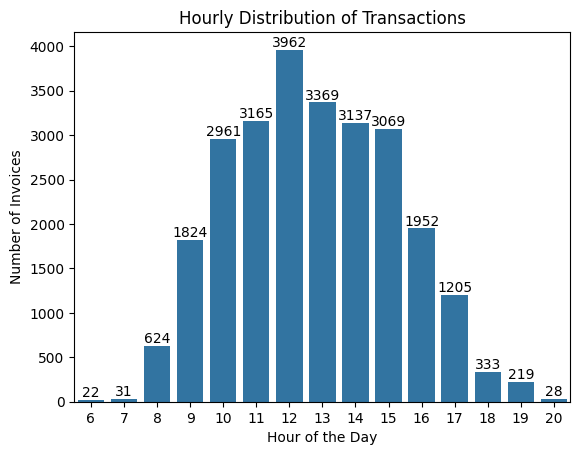

In [ ]:
ax= sns.barplot(df.groupby("Hour")["InvoiceNo"].nunique())
ax.bar_label(ax.containers[0])
plt.title("Hourly Distribution of Transactions")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Invoices")

Insights:

1. Transaction Hours:

  The store operates and records transactions from 6 AM to 9 PM which is suprising for online retail business.
2. Peak Transaction Hours:

  The busiest hours for transactions are between 10 AM and 3 PM, with the highest activity at 12 PM, followed by 1 PM.
3. Gradual Decline in Activity:

  After 3 PM, the number of invoices begins to decline steadily, with a noticeable drop after 4 PM. This suggests a slowdown in sales toward the late afternoon and evening.
4. Minimal Activity Early Morning and Evening:

  There is very little activity early in the morning (before 9 AM) and in the late evening (after 6 PM).

In [ ]:
df.groupby("Month")["InvoiceNo"].nunique().sort_values(ascending=False)

,InvoiceNo
Month,
Nov,3462
Dec,3040
Oct,2637
Sep,2327
May,2162
Jun,2012
Mar,1983
Jul,1927
Apr,1744


In [ ]:
df[df["Year"] ==2010].groupby("Month")["InvoiceNo"].nunique()

,InvoiceNo
Month,
Dec,2025


Text(0, 0.5, 'Number of Invoices')

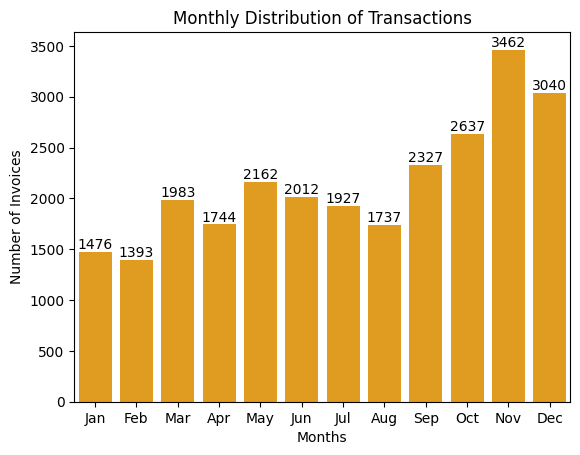

In [ ]:
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
ax= sns.barplot(df.groupby("Month")["InvoiceNo"].nunique(),order=month_order, color="orange")
ax.bar_label(ax.containers[0])
plt.title("Monthly Distribution of Transactions")
plt.xlabel("Months")
plt.ylabel("Number of Invoices")

Insights:

1. High Transaction Months:

  * The months with the highest transaction counts are November (3,462 invoices) and December (3,040 invoices). The spike in December is notable given that the dataset covers only part of the month (up to 9th December), suggesting strong end-of-year sales.
  * October (2,637 invoices) and September (2,327 invoices) also show high transaction volumes, possibly indicating a seasonal trend leading into the end-of-year sales surge.
2. Lower Transaction Months:

  * January (1,476 invoices) and February (1,393 invoices) have the lowest transaction counts. This drop in early months of the year might reflect post-holiday reduced spending or seasonal slowdowns after the holiday season.
3. Transactions Surge:

  * In December 2010, the dataset recorded 2,025 orders for the whole month. By December 2011, over 1,000 orders were placed in just the first 9 days, indicating a strong business growth and increased customer demand.  

In [ ]:
df.groupby("is_weekend")["InvoiceNo"].nunique().sort_values(ascending=False)

,InvoiceNo
is_weekend,
False,23519
True,2381


* Out of all transactions, 2,381 orders were placed on weekends, while 23,519 orders occurred on weekdays.
* This indicates that a significantly higher volume of orders is made during the week compared to weekends.

In [ ]:
df.groupby("WeekDay")["InvoiceNo"].nunique().sort_values(ascending=False)

,InvoiceNo
WeekDay,
3,5660
2,4815
1,4722
4,4184
0,4138
6,2381


* No orders were placed on Saturdays, which is unexpected given that the business operates online.

In [ ]:
df.drop(columns=["Year","Month","Hour",'is_weekend'], inplace=True)

### Global Presence

In [ ]:
print("Countries with most traffic")
print(df.groupby("Country")["InvoiceNo"].nunique().sort_values(ascending=False).head())
print()
print("Countries with least traffic")
print(df.groupby("Country")["InvoiceNo"].nunique().sort_values(ascending=True).head())

Countries with most traffic
Country
United Kingdom    23494
Germany             603
France              461
EIRE                360
Belgium             119
Name: InvoiceNo, dtype: int64

Countries with least traffic
Country
Brazil                  1
RSA                     1
Lebanon                 1
Saudi Arabia            2
United Arab Emirates    3
Name: InvoiceNo, dtype: int64


Insights:

* The United Kingdom dominates with the highest transaction volume, accounting for the vast majority of traffic. Other European countries such as Germany, France, and EIRE also show significant activity, indicating a strong market presence in these regions.
* Minimal Presence in Emerging Markets like Brazil, South Africa, and Lebanon have only 1 invoice each, indicating very limited transaction activity. These emerging markets may have high growth potential, but current engagement is minimal.

In [ ]:
df.groupby("Country")["CustomerID"].nunique().sort_values(ascending=False).head(10)

,CustomerID
Country,
United Kingdom,3950
Germany,95
France,87
Spain,31
Belgium,25
Switzerland,21
Portugal,19
Italy,15
Finland,12


Insights:

1. Dominance of the United Kingdom:

  * The United Kingdom has the highest number of customers by a significant margin, with 3,950 customers. This indicates that the UK is the primary market, with substantial engagement and customer base.
2. Strong Presence in Major European Markets:

  * Germany (95 customers) and France (87 customers) also have notable customer numbers, though significantly lower than the UK. This shows a strong presence in these key European markets.
3. Lower Customer Numbers in Southern and Central Europe:

  * Countries like Spain (31 customers), Belgium (25 customers), and Switzerland (21 customers) have fewer customers compared to the UK. These markets have potential for growth and may benefit from localized marketing strategies.
4. Opportunities in Smaller European Markets:

  * Portugal (19 customers), Italy (15 customers), Finland (12 customers), and Austria (11 customers) show even smaller customer bases. These countries represent niche markets where targeted efforts could enhance customer acquisition and engagement.


### Missing Description value treatment

In [ ]:
#Free item unit price is given as 0
# Replacing missing description as Free item where unit price is 0
df.loc[df["UnitPrice"] == 0, "Description"] = df.loc[df["UnitPrice"] == 0, "Description"].fillna("Free item")

In [ ]:
# 25% of transactions have missing CustomerId
# check whether these transcations happened for some particular invoices
df[df["CustomerID"].isna()].InvoiceNo.nunique()

3710

In [ ]:
# 25% of transactions have missing CustomerId
# check whether these transcations happened for some particular dates
df[df["CustomerID"].isna()].Date.nunique()

277

* Dataset has entries for 12 months, i.e., 365 days. Out of all dates, CustomerID are missing for 25 % of transactions over 277 days. This suggests the transactions are done by Guest customers.

In [ ]:
df.CustomerID.fillna("Unknown",inplace=True)

In [ ]:
df[(df["UnitPrice"]==0)& (df["Description"]=="Free item")].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,WeekDay,Date
622,536414,22139,Free item,56,2010-12-01 11:52:00,0.0,Unknown,United Kingdom,2,2010-12-01
1970,536545,21134,Free item,1,2010-12-01 14:32:00,0.0,Unknown,United Kingdom,2,2010-12-01
1971,536546,22145,Free item,1,2010-12-01 14:33:00,0.0,Unknown,United Kingdom,2,2010-12-01
1972,536547,37509,Free item,1,2010-12-01 14:33:00,0.0,Unknown,United Kingdom,2,2010-12-01
1987,536549,85226A,Free item,1,2010-12-01 14:34:00,0.0,Unknown,United Kingdom,2,2010-12-01


In [ ]:
df.InvoiceNo.nunique()

25900

In [ ]:
df[~df["CustomerID"].isna()].InvoiceNo.nunique()

25900

In [ ]:
df[df["Description"].isna()]["StockCode"].unique()

array([], dtype=object)

### Feature enggineering to define new columns for purchase, cancellation or return.

In [ ]:
df["Abs_Quantity"] = df["Quantity"].apply(lambda x: abs(x))

In [ ]:
# Defining Cancelled orders
df["Order_Cancelled"] = df.InvoiceNo.apply(lambda x: 1 if "c" in x.lower() else 0)

In [ ]:
df[df["Order_Cancelled"]==1].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,WeekDay,Date,Abs_Quantity,Order_Cancelled
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,2,2010-12-01,1,1
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,2,2010-12-01,1,1
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,2,2010-12-01,12,1
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,2,2010-12-01,24,1
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,2,2010-12-01,24,1


In [ ]:
# Defining Returned orders
df["Order_Returned"] = df[["Quantity","Order_Cancelled"]].apply(lambda row: 1 if (row["Quantity"]<0)&(row["Order_Cancelled"]==0) else 0,axis=1)
df[df["Order_Returned"]==1].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,WeekDay,Date,Abs_Quantity,Order_Cancelled,Order_Returned
2406,536589,21777,Free item,-10,2010-12-01 16:50:00,0.0,Unknown,United Kingdom,2,2010-12-01,10,0,1
4347,536764,84952C,Free item,-38,2010-12-02 14:42:00,0.0,Unknown,United Kingdom,3,2010-12-02,38,0,1
7188,536996,22712,Free item,-20,2010-12-03 15:30:00,0.0,Unknown,United Kingdom,4,2010-12-03,20,0,1
7189,536997,22028,Free item,-20,2010-12-03 15:30:00,0.0,Unknown,United Kingdom,4,2010-12-03,20,0,1
7190,536998,85067,Free item,-6,2010-12-03 15:30:00,0.0,Unknown,United Kingdom,4,2010-12-03,6,0,1


In [ ]:
df[df["Order_Cancelled"]==1].shape

(9251, 13)

In [ ]:
df[df["Order_Returned"]==1].InvoiceNo.nunique()

1336

In [ ]:
df[df["Order_Cancelled"]==1].InvoiceNo.nunique()

3836

In [ ]:
# checking data sanity for cancelled orders
(df[(df["Quantity"]>0) &(df["Order_Cancelled"]==1)])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,WeekDay,Date,Abs_Quantity,Order_Cancelled,Order_Returned


In [ ]:
# check data sanity for returned orders
(df[(df["Quantity"]>0) &(df["Order_Returned"]==1)])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,WeekDay,Date,Abs_Quantity,Order_Cancelled,Order_Returned


In [ ]:
df[(df["Order_Cancelled"]==0)& (df["Order_Returned"]==0)& (df["UnitPrice"]==0)].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,WeekDay,Date,Abs_Quantity,Order_Cancelled,Order_Returned
622,536414,22139,Free item,56,2010-12-01 11:52:00,0.0,Unknown,United Kingdom,2,2010-12-01,56,0,0
1970,536545,21134,Free item,1,2010-12-01 14:32:00,0.0,Unknown,United Kingdom,2,2010-12-01,1,0,0
1971,536546,22145,Free item,1,2010-12-01 14:33:00,0.0,Unknown,United Kingdom,2,2010-12-01,1,0,0
1972,536547,37509,Free item,1,2010-12-01 14:33:00,0.0,Unknown,United Kingdom,2,2010-12-01,1,0,0
1987,536549,85226A,Free item,1,2010-12-01 14:34:00,0.0,Unknown,United Kingdom,2,2010-12-01,1,0,0


In [ ]:
# Defining successful orders
df["Order_Purchased"] = df.apply(lambda row: 1 if (not (row["Order_Cancelled"] == 1 or row["Order_Returned"] == 1)) & (row["UnitPrice"]>0) else 0, axis=1)
df[df["Order_Purchased"]==1].InvoiceNo.nunique()

19960

In [ ]:
# First, use idxmax to assign the order status
df["Order_Status"] = df[["Order_Cancelled", "Order_Returned", "Order_Purchased"]].idxmax(axis=1)

# Then, check where all three values are zero and set 'Free' for those rows
df.loc[(df["Order_Cancelled"] == 0) & (df["Order_Returned"] == 0) & (df["Order_Purchased"] == 0), "Order_Status"] = "Free"
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,WeekDay,Date,Abs_Quantity,Order_Cancelled,Order_Returned,Order_Purchased,Order_Status
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2,2010-12-01,6,0,0,1,Order_Purchased
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2,2010-12-01,6,0,0,1,Order_Purchased
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2,2010-12-01,8,0,0,1,Order_Purchased
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2,2010-12-01,6,0,0,1,Order_Purchased
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2,2010-12-01,6,0,0,1,Order_Purchased


In [ ]:
df[(df["Order_Cancelled"]==1) & (df["Order_Purchased"]==1)].InvoiceNo.nunique()

0

In [ ]:
df[(df["Order_Returned"]==1) & (df["Order_Purchased"]==1)].InvoiceNo.nunique()

0

In [ ]:
df[(df["Order_Status"]=="Order_Returned")& (~(df["UnitPrice"]==0))].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,WeekDay,Date,Abs_Quantity,Order_Cancelled,Order_Returned,Order_Purchased,Order_Status


In [ ]:
df[(df["Order_Status"]=="Order_Returned")].Quantity.unique()

array([  -10,   -38,   -20,    -6,   -22,    -2,   -30,   -70,  -130,
         -80,  -120,   -40,    -5,   -12,   -25,   -14,   -15,   -69,
          -3,  -140,  -320,   -24,   -35,   -21,   -43,   -19,   -11,
         -18,   -44,   -50,    -9,   -77,  -223,    -4,    -1,  -150,
         -13,  -723,  -177,   -32,  -100,   -28,  -145,   -36,   -48,
        -106,   -60,  -939,   -54,  -201,   -53,   -29, -2600,  -990,
          -8,  -290,   -45,  -310,   -61,   -41,   -64,   -84, -1400,
        -300,   -57,   -59,   -16,   -31,   -17,  -207,   -52,  -206,
        -217, -1430,  -162,  -230,  -173,  -390,  -234,   -42,    -7,
         -99,   -92,  -741,  -400,  -114,   -88,   -33,  -391,   -87,
        -278,  -154, -3000,  -675,  -600,  -210,  -345,  -975, -1200,
       -1121,   -27,  -541, -1277,  -197, -1100,   -63, -5368,  -259,
         -82,  -178,  -110,   -47,  -323,  -450,  -232,   -83,  -153,
        -524, -2472,  -105,   -34,   -46,   -75,  -690,   -39,   -66,
        -180,  -194,

In [ ]:
df.groupby("Order_Status").InvoiceNo.nunique()

,InvoiceNo
Order_Status,
Free,821
Order_Cancelled,3836
Order_Purchased,19960
Order_Returned,1336


Insights:
1. Data Sanity:
  * The data in the dataset appears to be sane and reliable, with accurate values observed in the Quantity, InvoiceNo, and UnitPrice fields.
2. Guest Transactions:
  * Dataset has entries for 12 months, i.e., 365 days. Out of all dates, CustomerID are missing for 25 % of transactions over 277 days. This suggests the transactions are done by Guest customers.
3.Order Purchased (19,959 Orders):
  * The majority of the transactions (about 77%) were successfully completed as purchases, indicating a strong order fulfillment rate and high customer commitment to completing purchases.
  * This high number of completed orders reflects positive customer engagement and suggests that the store’s checkout process, product offerings, and user experience are effective in encouraging customers to finalize purchases.
4. Order Cancelled (3,836 Orders):

  * Around 15% of the orders were canceled, which is significant and may indicate potential issues such as:
    Customer indecision or change of mind after placing an order.
    Problems with payment processing or product availability.
    Possible technical or logistical issues leading to order cancellations.

5. Order Returned (1,336 Orders):

  * Approximately 5% of the orders were returned, which is relatively moderate but still noteworthy. This could imply:
    * Customer dissatisfaction with products, possibly due to quality issues, incorrect sizing, or unmet expectations.
    * Potential mismatches between product descriptions and actual items received.
    * Reducing returns could involve improving product descriptions, quality checks, and providing better customer support or clearer return policies.
6. Free items (819 Transactions):
  * A small portion of the dataset, 4% of the transactions, are labeled as "Free". These may represent promotional orders, special offers, or administrative adjustments.
  * Further analysis could help determine if these orders are part of marketing strategies or internal processes aimed at customer retention or inventory management.


### Stockcode Analysis

In [ ]:
df = df[~df['Description'].str.contains("Adjust bad debt", case=False, na=False)]

In [ ]:
df.StockCode.nunique()

4069

In [ ]:
df[df["UnitPrice"]<10].StockCode.nunique()

3982

In [ ]:
df[(df["UnitPrice"]>=10) & df["UnitPrice"]<100].StockCode.nunique()

4069

In [ ]:
df[(df["UnitPrice"]>=100)& (df["UnitPrice"]<1_000 )].StockCode.nunique()

17

In [ ]:
df[(df["UnitPrice"]>=1_000) & (df["UnitPrice"]<10000)].StockCode.nunique()

7

In [ ]:
df[(df["UnitPrice"]>=10_000)].StockCode.nunique()

2

Insights:
1. Overall Unique StockCode Count:

  * The total unique count of StockCode is 4,070, which represents the distinct number of items available in the entire dataset.
2. Unique StockCodes for UnitPrice < 10:

  * 3,983 unique stock codes with a UnitPrice less than 10.
3. Unique StockCodes for 10 ≤ UnitPrice < 100:

  * 4,070 unique stock codes with UnitPrice between 10 and 100.
4. Possible Overlap and Discrepancy:

  * The total count of unique StockCode is 4,070, which matches the number of unique stock codes in the second price range (10 ≤ UnitPrice < 100).
  * The discrepancy arises because many stock codes that have prices between 10 and 100 may also have prices below 10 in other records. This causes the counts in the first category to seem distinct when, in reality, they overlap significantly with the second category.
  *  Some stock codes are represented in both price ranges. For instance, a product may be priced below 10 in one transaction and above 10 in another, which leads to an inflated count when examining the two ranges separately.
5. High-Value Products (UnitPrice >= 100 and < 1,000):

  *  Unique StockCodes: 16
  *  This indicates a relatively small selection of items priced between 100 and 999. Given that this price range typically includes higher-end or specialty products, the limited number of unique stock codes suggests a niche offering in this category.
6. Premium Products (UnitPrice >= 1,000 and < 10,000):

  *  Unique StockCodes: 7
  *  The count further narrows to just 7 unique stock codes, indicating an even more specialized category. These could be luxury items, bulk products, or high-value electronics, suggesting that this segment might cater to a very specific customer demographic.
7. Luxury or Specialty Items (UnitPrice >= 10,000):

  *  Unique StockCodes: 3
  *  This range shows only 3 unique stock codes, highlighting that very few items fall into this ultra-high price category. These products could be considered luxury goods or exclusive items, likely requiring targeted marketing strategies.

The data shows a progressive decrease in the number of unique stock codes as the price increases, indicating a more concentrated and specialized inventory in higher price ranges.
The limited variety in the high-value categories may suggest a strategic focus on high-margin items, which can be appealing for profitability.
Given the small counts of unique stock codes in the premium and luxury ranges, it may be beneficial for the store to consider expanding its offerings in these segments to attract higher-value customers.
Overall, the pricing strategy appears to reflect a clear distinction between standard and premium products, which could influence inventory decisions and marketing approaches.

In [ ]:
df[df["UnitPrice"]>10000].Description.unique()

array(['AMAZON FEE', 'Manual'], dtype=object)

In [ ]:
df[df["UnitPrice"]< 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,WeekDay,Date,Abs_Quantity,Order_Cancelled,Order_Returned,Order_Purchased,Order_Status


*  "Adjust bad debt" implies making changes in financial statements to accurately reflect the loss due to uncollectible debts, ensuring that the company's financial position is correctly reported.
* We will exclude rows containing "adjust bad debt" from the DataFrame to proceed with further analysis.

In [ ]:
df = df[~df['Description'].str.contains("Adjust bad debt", case=False, na=False)]

###Identifying the Top Stocks for Each Customer as well as overall transactions

In [ ]:
df.groupby("StockCode")["Description"].nunique().head(10)

,Description
StockCode,
10002,2
10080,3
10120,1
10123C,2
10123G,1
10124A,1
10124G,1
10125,1
10133,2


* It appears that each stock code has multiple associated descriptions.
* In total 650 out of 4070 StockCode have multiple descriptions.

In [ ]:
df.groupby("StockCode").Quantity.sum().sort_values(ascending=False).head(10)

,Quantity
StockCode,
22197,56427
84077,53751
85099B,47260
85123A,38811
84879,36122
21212,36016
23084,30597
22492,26437
22616,26299


Text(0, 0.5, 'Count')

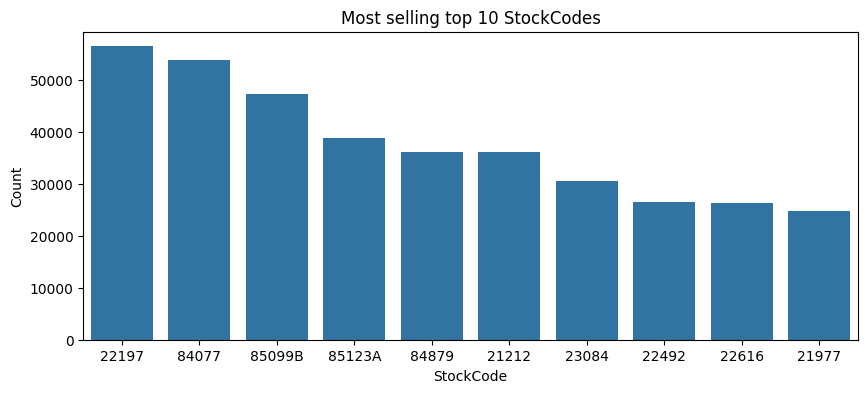

In [ ]:
plt.figure(figsize=(10,4))
sns.barplot(df.groupby("StockCode").Quantity.sum().sort_values(ascending=False).head(10))
plt.title("Most selling top 10 StockCodes")
plt.xlabel("StockCode")
plt.ylabel("Count")

Insights:

1. Top-Selling Products:

  * StockCode 22197 is the highest-selling item with 56,427 units sold. This product has a significant lead over the other items, indicating it might be a bestseller or a highly popular item in the product range.
  * StockCode 84077 follows with 53,751 units sold. The gap between this and the top item suggests that while both are popular, 22197 has a notable edge.
2. Other Popular Products:

  * StockCodes 85099B, 85123A, 84879, and 21212 are in the middle range, with quantities ranging from 38,811 to 47,260 units sold.
  * These products represent strong sellers but don't reach the top two items' levels. They might be consistent sellers across a range of customers.
3. StockCode Trends:

  * The list is fairly balanced between several products with significant sales figures, indicating that the top-selling items might be responsible for a substantial portion of total sales volume.
  * It's likely that these products are either frequently reordered by customers or are core products that see consistent demand.
4. Potential Focus for Inventory Management:

  * StockCode 22197 should be prioritized for inventory management and restocking due to its high turnover rate.
  * Products like 84077 and 85099B should also be closely monitored to ensure that stock levels align with demand, preventing stockouts and missed sales opportunities.
5. Marketing Opportunities:

  * The high sales of these items suggest potential opportunities for cross-selling or bundling them with other products.
  * Promotions or discounts on these high-selling items could help to boost overall sales volume or attract new customers to the store.

In [ ]:
df_without_return = df[df["Order_Status"]!="Order_Returned"]

In [ ]:
df_without_return["net_orders"] = df_without_return["Quantity"].apply(lambda x: 1 if x>0 else -1)

In [ ]:
df_without_return.groupby("StockCode").net_orders.sum().sort_values(ascending=False).head(10)

,net_orders
StockCode,
85123A,2216
85099B,2068
22423,1829
47566,1680
20725,1538
84879,1464
22197,1368
21212,1337
22720,1321


Insights:

1. Top Net Ordered Products:

  * StockCode 85123A has the highest net number of orders with 2,216. This suggests that this product is a consistent seller and has a high volume of orders relative to returns.
  * StockCode 85099B follows closely with 2,068 net orders. It’s likely another popular item among customers, indicating strong demand and low return rates.
2. Other High Net Order Products:

  * StockCodes 22423, 47566, 20725, and 84879 also show strong net order numbers, ranging from 1,829 to 1,464. These items contribute significantly to the overall sales and likely have steady demand.
3. Consistency in Product Demand:

  * The presence of certain StockCodes like 85123A, 85099B, 84879, and 21212 in both the quantity-based analysis (from the previous question) and in the net order analysis suggests that these products have consistently high demand.
  * This indicates they are not only sold in large quantities but also have lower rates of returns relative to purchases, making them reliable products from an inventory management perspective.

4. Potential Focus Areas:

  * StockCode 85123A should be a priority for restocking and sales focus, as it appears in both top net orders and total quantities sold.
  * Products like 22423, 47566, and 20725 also show high net orders, making them candidates for targeted marketing campaigns or promotions, as they have proven to be popular with customers.

In [ ]:
# Step 1: Group by StockCode and sum the 'net_orders' column
top_stock_codes = (
    df_without_return.groupby("StockCode")["net_orders"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# Step 2: Convert the result to a DataFrame for merging
top_stock_codes_df = top_stock_codes.reset_index()

# Step 3: Merge to get corresponding descriptions
result = top_stock_codes_df.merge(df_without_return[['StockCode', 'Description']], on='StockCode', how='left').drop_duplicates()

# Step 4: Display the result
print(result)


      StockCode  net_orders                         Description
0        85123A        2216  WHITE HANGING HEART T-LIGHT HOLDER
1214     85123A        2216                                   ?
2288     85123A        2216  CREAM HANGING HEART T-LIGHT HOLDER
2300     85099B        2068             JUMBO BAG RED RETROSPOT
4456      22423        1829            REGENCY CAKESTAND 3 TIER
6645      47566        1680                       PARTY BUNTING
8365      20725        1538             LUNCH BAG RED RETROSPOT
8492      20725        1538                LUNCH BAG RED SPOTTY
9991      84879        1464       ASSORTED COLOUR BIRD ORNAMENT
11479     22197        1368                SMALL POPCORN HOLDER
12071     22197        1368                      POPCORN HOLDER
12947     21212        1337     PACK OF 72 RETROSPOT CAKE CASES
14314     22720        1321   SET OF 3 CAKE TINS PANTRY DESIGN 
14884     22720        1321                           Free item
15781     22383        1286             

In [ ]:
# Group by StockCode and count unique descriptions
stockcode_description_counts = df.groupby("StockCode")["Description"].nunique()

# Filter to display only StockCodes with more than 1 unique description
multiple_descriptions = stockcode_description_counts[stockcode_description_counts > 1]

# Display the result
print("Count of StockCode with multiple_descriptions:", len(multiple_descriptions))
multiple_descriptions.head(10)


Count of StockCode with multiple_descriptions: 1324


,Description
StockCode,
10002,2
10080,3
10123C,2
10133,2
15030,2
15036,2
15044B,2
15058A,3
15058B,2


In [ ]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'WeekDay', 'Date', 'Abs_Quantity',
       'Order_Cancelled', 'Order_Returned', 'Order_Purchased', 'Order_Status'],
      dtype='object')

In [ ]:
# Step 1: Convert CustomerID to string to avoid merge issues
df['CustomerID'] = df['CustomerID'].astype(str)


# Step 2: Calculate the total quantity for each StockCode per customer
top_stock_codes = (
    df[df["CustomerID"] != "Unknown"]  # Exclude unknown customers
    .groupby(["CustomerID", "StockCode"])["Quantity"]  # Group by CustomerID and StockCode
    .sum()  # Sum the Quantity for each StockCode per customer
    .reset_index()
)

top_stock_codes['CustomerID'] = top_stock_codes['CustomerID'].astype(str)
# Step 3: Sort by CustomerID and Quantity to get the top 2 StockCodes for each customer
top_stock_codes_sorted = top_stock_codes.sort_values(["CustomerID", "Quantity"], ascending=[True, False])

# Step 4: Group by CustomerID and take the top 2 StockCodes
top_2_stock_codes = top_stock_codes_sorted.groupby("CustomerID").head(2)

# Step 5: Merge with the original DataFrame to get the corresponding Descriptions
filtered_df = top_2_stock_codes.merge(
    df[["CustomerID", "StockCode", "Description"]],
    on=["CustomerID", "StockCode"],
    how="left"
).drop_duplicates(subset=["CustomerID", "StockCode"])

# Step 6: Group by CustomerID and aggregate the StockCode and Description as lists
result = (
    filtered_df.groupby("CustomerID")
    .agg({
        "StockCode": list,  # Get the top 2 unique StockCodes
        "Description": list  # Get the corresponding top 2 unique Descriptions
    })
    .reset_index()
)

# Step 7: Display the result
result.head()

,CustomerID,StockCode,Description
0,12346.0,[23166],[MEDIUM CERAMIC TOP STORAGE JAR]
1,12347.0,"[23076, 84558A]","[ICE CREAM SUNDAE LIP GLOSS, 3D DOG PICTURE PL..."
2,12348.0,"[23077, 23078]","[DOUGHNUT LIP GLOSS , ICE CREAM PEN LIP GLOSS ]"
3,12349.0,"[21231, 21232]","[SWEETHEART CERAMIC TRINKET BOX, STRAWBERRY CE..."
4,12350.0,"[22348, 20615]","[TEA BAG PLATE RED RETROSPOT, BLUE POLKADOT PA..."


In [ ]:
top_stock_codes

,CustomerID,StockCode,Quantity
0,12346.0,23166,0
1,12347.0,16008,24
2,12347.0,17021,36
3,12347.0,20665,6
4,12347.0,20719,40
...,...,...,...
267610,18287.0,84920,4
267611,18287.0,85039A,96
267612,18287.0,85039B,120
267613,18287.0,85040A,48


In [ ]:
df[df["CustomerID"] == "12346.0"].groupby("StockCode").Quantity.sum()

,Quantity
StockCode,
23166,0


###Sales Analysis

In [ ]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'WeekDay', 'Date', 'Abs_Quantity',
       'Order_Cancelled', 'Order_Returned', 'Order_Purchased', 'Order_Status'],
      dtype='object')

In [ ]:
df["Sales"] = df["Quantity"]*df["UnitPrice"]

In [ ]:
df_without_free = df[df["Order_Status"]!="Free"]

In [ ]:
df_sales = df_without_free.groupby("InvoiceNo").agg(
    {'CustomerID': 'first',
     'Country': 'first',
      'InvoiceDate': 'first',
      'Order_Cancelled': 'sum',
      'Order_Returned': 'sum',
      'Order_Purchased': 'sum',
      'Order_Status': 'first',
      'Sales': 'sum'}
).reset_index()
df_sales.head()

,InvoiceNo,CustomerID,Country,InvoiceDate,Order_Cancelled,Order_Returned,Order_Purchased,Order_Status,Sales
0,536365,17850.0,United Kingdom,2010-12-01 08:26:00,0,0,7,Order_Purchased,139.12
1,536366,17850.0,United Kingdom,2010-12-01 08:28:00,0,0,2,Order_Purchased,22.20
2,536367,13047.0,United Kingdom,2010-12-01 08:34:00,0,0,12,Order_Purchased,278.73
3,536368,13047.0,United Kingdom,2010-12-01 08:34:00,0,0,4,Order_Purchased,70.05
4,536369,13047.0,United Kingdom,2010-12-01 08:35:00,0,0,1,Order_Purchased,17.85


In [ ]:
df_sales.groupby("Order_Status")["Sales"].describe().T

Order_Status,Order_Cancelled,Order_Purchased,Order_Returned
count,3836.000000,19959.000000,1336.0
mean,-233.049982,532.644358,0.0
std,3195.762532,1778.896266,0.0
min,-168469.600000,0.380000,0.0
25%,-41.350000,151.690000,0.0
50%,-16.840000,303.300000,0.0
75%,-7.950000,493.450000,0.0
max,-0.390000,168469.600000,0.0


Insights:

1. Order_Cancelled:
  * Count: There are 3,836 cancelled orders in the dataset.
  * Mean Sales: The average sale value for cancelled orders is negative at -233.05, which suggests that cancellations result in some sort of negative value, likely refunds or other deductions.
  * Standard Deviation (std): A high standard deviation of 3,195.76 indicates significant variability in the negative sales values for cancelled orders.
  * Range of Sales:
    * Min: The minimum value is -168,469.60, showing a very large cancellation or refund.
    * 25%, 50%, 75% (Quartiles): The quartiles are also negative, with the median (50%) being -16.84, indicating that half of the cancelled orders have sales values less negative than this.
    * Max: The least negative value is -0.39.
  
  Cancelled Orders have negative sales values, reflecting refunds or chargebacks, and the high variability suggests that cancellations can occur with both large and small orders.

2. Order_Purchased:
  * Count: 19,959 purchased orders are recorded.
  * Mean Sales: The average sale value is 532.64, meaning that purchases have a positive average sales value.
  * Standard Deviation (std): A standard deviation of 1,778.90 reflects a wide range of sales values among purchased orders.
  * Range of Sales:
    * Min: The smallest sale for a purchase is 0.38.
    * 25%, 50%, 75% (Quartiles): The middle 50% of orders range between 151.69 and 493.45, with the median (50%) being 303.30.
    * Max: The highest sale value is 168,469.60, indicating a very large purchase.
  
  Purchased Orders are where actual revenue is being generated, with a typical sale around 303.30. The distribution of sales shows that the majority of purchases lie between 151.69 and 493.45, with some very high-value purchases.
3. Order_Returned:
  * Count: There are 1,336 returned orders.
  * Mean Sales: The mean sale value is 0.0, indicating that returned orders have no associated sales values (likely all refunds, adjustments, or canceled out sales).
  * Standard Deviation (std): There is no variability in the sales of returned orders, as the standard deviation is 0.
  * Range of Sales: The sales values are all 0 for returned orders.
  
  Returned Orders all have a sales value of 0, indicating that returned orders likely negate the original sale.

In [ ]:
df[(df["Order_Status"]=="Order_Returned")]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,WeekDay,Date,Abs_Quantity,Order_Cancelled,Order_Returned,Order_Purchased,Order_Status,Sales
2406,536589,21777,Free item,-10,2010-12-01 16:50:00,0.0,Unknown,United Kingdom,2,2010-12-01,10,0,1,0,Order_Returned,-0.0
4347,536764,84952C,Free item,-38,2010-12-02 14:42:00,0.0,Unknown,United Kingdom,3,2010-12-02,38,0,1,0,Order_Returned,-0.0
7188,536996,22712,Free item,-20,2010-12-03 15:30:00,0.0,Unknown,United Kingdom,4,2010-12-03,20,0,1,0,Order_Returned,-0.0
7189,536997,22028,Free item,-20,2010-12-03 15:30:00,0.0,Unknown,United Kingdom,4,2010-12-03,20,0,1,0,Order_Returned,-0.0
7190,536998,85067,Free item,-6,2010-12-03 15:30:00,0.0,Unknown,United Kingdom,4,2010-12-03,6,0,1,0,Order_Returned,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535333,581210,23395,check,-26,2011-12-07 18:36:00,0.0,Unknown,United Kingdom,2,2011-12-07,26,0,1,0,Order_Returned,-0.0
535335,581212,22578,lost,-1050,2011-12-07 18:38:00,0.0,Unknown,United Kingdom,2,2011-12-07,1050,0,1,0,Order_Returned,-0.0
535336,581213,22576,check,-30,2011-12-07 18:38:00,0.0,Unknown,United Kingdom,2,2011-12-07,30,0,1,0,Order_Returned,-0.0
536908,581226,23090,missing,-338,2011-12-08 09:56:00,0.0,Unknown,United Kingdom,3,2011-12-08,338,0,1,0,Order_Returned,-0.0


In [ ]:
df[(df["Order_Status"]=="Order_Returned")].Description.unique()

array(['Free item', '?', 'check', 'damages', 'faulty', 'Dotcom sales',
       'reverse 21/5/10 adjustment', 'mouldy, thrown away.', 'counted',
       'Given away', 'Dotcom', 'label mix up', 'samples/damages',
       'thrown away', 'incorrectly made-thrown away.', 'showroom', 'MIA',
       'Dotcom set', 'wrongly sold as sets', 'Amazon sold sets',
       'dotcom sold sets', 'wrongly sold sets', '? sold as sets?',
       '?sold as sets?', 'Thrown away.', 'damages/display',
       'damaged stock', 'broken', 'throw away', 'wrong barcode (22467)',
       'wrong barcode', 'barcode problem', '?lost',
       "thrown away-can't sell.", "thrown away-can't sell", 'damages?',
       're dotcom quick fix.', "Dotcom sold in 6's", 'sold in set?',
       'cracked', 'sold as 22467', 'Damaged',
       'mystery! Only ever imported 1800',
       'MERCHANT CHANDLER CREDIT ERROR, STO', 'POSSIBLE DAMAGES OR LOST?',
       'damaged', 'DAMAGED', 'Display', 'Missing', 'wrong code?',
       'wrong code', 'adjust'

In [ ]:
df[(df["Order_Status"]=="Order_Returned") & (df["Description"]=="Free item")].InvoiceNo.count()

862

  * 64% of returned orders are free items, likely provided as loyalty gifts to customers. To enhance customer satisfaction and reduce the rate of returns, it is essential to improve the quality and relevance of these loyalty gifts. By aligning these products more closely with customer preferences and ensuring they add value, we can foster a more positive experience and minimize returns.

<Axes: xlabel='WeekDay', ylabel='Absolute_Sales'>

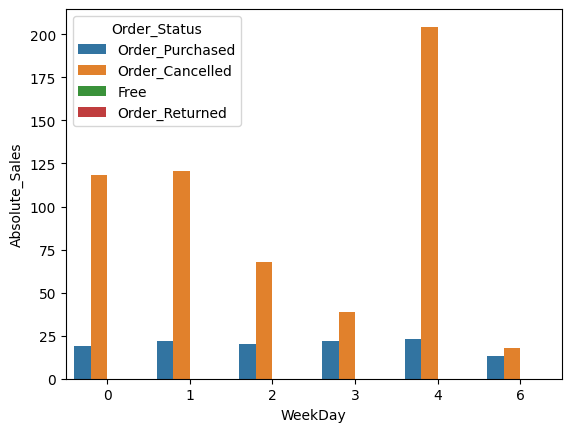

In [ ]:
df['Absolute_Sales'] = df['Sales'].abs()
sns.barplot(data=df, x="WeekDay",y="Absolute_Sales",hue="Order_Status", ci=None)

Insights:
1. Order Cancelled:
  * Peak Cancellations on Thursdays (WeekDay 4).
    
  * Significant Cancellations on Mondays and Fridays (WeekDay 0 and 1) suggesting that cancellations are frequent at the start and end of the workweek, possibly due to weekend order adjustments or customer indecisions.
  * Minimal Cancellations on Sundays (WeekDay 6).

2. Order Purchased:
  * Highest Sales on Thursdays (WeekDay 3) indicates a peak in purchasing activity mid-week, possibly driven by promotional campaigns or typical shopping patterns.
  * Consistently High Sales across all weekdays. This consistent performance reflects steady customer engagement and order completion throughout the week.
  * Lower Sales on Sundays (WeekDay 6).

3. Order Returned:
  * Zero Recorded Sales for Returns Across All Days.
  * No sales are recorded under the Order_Returned category, suggesting returns do not have associated financial data.

In [ ]:
df[df["Sales"] == df[(df["Order_Cancelled"]==1)].Sales.min()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,WeekDay,Date,Abs_Quantity,Order_Cancelled,Order_Returned,Order_Purchased,Order_Status,Sales,Absolute_Sales
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom,4,2011-12-09,80995,1,0,0,Order_Cancelled,-168469.6,168469.6


In [ ]:
print(df[df["Sales"] <0].shape)

(9251, 17)


In [ ]:
df[(df["Sales"] <100)& (df["Sales"] >0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,WeekDay,Date,Abs_Quantity,Order_Cancelled,Order_Returned,Order_Purchased,Order_Status,Sales,Absolute_Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2,2010-12-01,6,0,0,1,Order_Purchased,15.30,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2,2010-12-01,6,0,0,1,Order_Purchased,20.34,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2,2010-12-01,8,0,0,1,Order_Purchased,22.00,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2,2010-12-01,6,0,0,1,Order_Purchased,20.34,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2,2010-12-01,6,0,0,1,Order_Purchased,20.34,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,4,2011-12-09,12,0,0,1,Order_Purchased,10.20,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,4,2011-12-09,6,0,0,1,Order_Purchased,12.60,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,4,2011-12-09,4,0,0,1,Order_Purchased,16.60,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,4,2011-12-09,4,0,0,1,Order_Purchased,16.60,16.60


In [ ]:
df[df["Sales"] <-1_000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,WeekDay,Date,Abs_Quantity,Order_Cancelled,Order_Returned,Order_Purchased,Order_Status,Sales,Absolute_Sales
15016,C537630,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:04:00,13541.33,Unknown,United Kingdom,1,2010-12-07,1,1,0,0,Order_Cancelled,-13541.33,13541.33
16232,C537644,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:34:00,13474.79,Unknown,United Kingdom,1,2010-12-07,1,1,0,0,Order_Cancelled,-13474.79,13474.79
16313,C537647,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:41:00,5519.25,Unknown,United Kingdom,1,2010-12-07,1,1,0,0,Order_Cancelled,-5519.25,5519.25
16356,C537651,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:49:00,13541.33,Unknown,United Kingdom,1,2010-12-07,1,1,0,0,Order_Cancelled,-13541.33,13541.33
16357,C537652,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:51:00,6706.71,Unknown,United Kingdom,1,2010-12-07,1,1,0,0,Order_Cancelled,-6706.71,6706.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481174,C577348,M,Manual,-1,2011-11-18 15:30:00,1149.98,Unknown,United Kingdom,4,2011-11-18,1,1,0,0,Order_Cancelled,-1149.98,1149.98
524601,C580604,AMAZONFEE,AMAZON FEE,-1,2011-12-05 11:35:00,11586.50,Unknown,United Kingdom,0,2011-12-05,1,1,0,0,Order_Cancelled,-11586.50,11586.50
524602,C580605,AMAZONFEE,AMAZON FEE,-1,2011-12-05 11:36:00,17836.46,Unknown,United Kingdom,0,2011-12-05,1,1,0,0,Order_Cancelled,-17836.46,17836.46
528087,C580726,CRUK,CRUK Commission,-1,2011-12-05 17:17:00,1100.44,14096.0,United Kingdom,0,2011-12-05,1,1,0,0,Order_Cancelled,-1100.44,1100.44


In [ ]:
df[df["Sales"] <-10_000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,WeekDay,Date,Abs_Quantity,Order_Cancelled,Order_Returned,Order_Purchased,Order_Status,Sales,Absolute_Sales
15016,C537630,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:04:00,13541.33,Unknown,United Kingdom,1,2010-12-07,1,1,0,0,Order_Cancelled,-13541.33,13541.33
16232,C537644,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:34:00,13474.79,Unknown,United Kingdom,1,2010-12-07,1,1,0,0,Order_Cancelled,-13474.79,13474.79
16356,C537651,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:49:00,13541.33,Unknown,United Kingdom,1,2010-12-07,1,1,0,0,Order_Cancelled,-13541.33,13541.33
43702,C540117,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:55:00,16888.02,Unknown,United Kingdom,2,2011-01-05,1,1,0,0,Order_Cancelled,-16888.02,16888.02
43703,C540118,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:57:00,16453.71,Unknown,United Kingdom,2,2011-01-05,1,1,0,0,Order_Cancelled,-16453.71,16453.71
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,1,2011-01-18,74215,1,0,0,Order_Cancelled,-77183.60,77183.60
222681,C556445,M,Manual,-1,2011-06-10 15:31:00,38970.00,15098.0,United Kingdom,4,2011-06-10,1,1,0,0,Order_Cancelled,-38970.00,38970.00
524601,C580604,AMAZONFEE,AMAZON FEE,-1,2011-12-05 11:35:00,11586.50,Unknown,United Kingdom,0,2011-12-05,1,1,0,0,Order_Cancelled,-11586.50,11586.50
524602,C580605,AMAZONFEE,AMAZON FEE,-1,2011-12-05 11:36:00,17836.46,Unknown,United Kingdom,0,2011-12-05,1,1,0,0,Order_Cancelled,-17836.46,17836.46
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom,4,2011-12-09,80995,1,0,0,Order_Cancelled,-168469.60,168469.60


In [ ]:
df[(df["StockCode"]=="AMAZONFEE")].InvoiceNo.nunique()

34

In [ ]:
df[(df["StockCode"]=="AMAZONFEE")& (df["Sales"]<0)].InvoiceNo.nunique()

32

* 32 out of 34 times, Amazon Fee is cancelled.

In [ ]:
df[df["Quantity"]<-100]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,WeekDay,Date,Abs_Quantity,Order_Cancelled,Order_Returned,Order_Purchased,Order_Status,Sales,Absolute_Sales
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03,15838.0,United Kingdom,3,2010-12-02,9360,1,0,0,Order_Cancelled,-280.80,280.80
4854,C536812,22574,HEART WOODEN CHRISTMAS DECORATION,-192,2010-12-02 16:58:00,0.72,16546.0,United Kingdom,3,2010-12-02,192,1,0,0,Order_Cancelled,-138.24,138.24
4855,C536812,22593,CHRISTMAS GINGHAM STAR,-144,2010-12-02 16:58:00,0.72,16546.0,United Kingdom,3,2010-12-02,144,1,0,0,Order_Cancelled,-103.68,103.68
4856,C536812,22595,CHRISTMAS GINGHAM HEART,-144,2010-12-02 16:58:00,0.72,16546.0,United Kingdom,3,2010-12-02,144,1,0,0,Order_Cancelled,-103.68,103.68
4857,C536812,22588,CARD HOLDER GINGHAM HEART,-192,2010-12-02 16:58:00,2.10,16546.0,United Kingdom,3,2010-12-02,192,1,0,0,Order_Cancelled,-403.20,403.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535330,581207,21688,mixed up,-337,2011-12-07 18:34:00,0.00,Unknown,United Kingdom,2,2011-12-07,337,0,1,0,Order_Returned,-0.00,0.00
535335,581212,22578,lost,-1050,2011-12-07 18:38:00,0.00,Unknown,United Kingdom,2,2011-12-07,1050,0,1,0,Order_Returned,-0.00,0.00
536908,581226,23090,missing,-338,2011-12-08 09:56:00,0.00,Unknown,United Kingdom,3,2011-12-08,338,0,1,0,Order_Returned,-0.00,0.00
538919,581422,23169,smashed,-235,2011-12-08 15:24:00,0.00,Unknown,United Kingdom,3,2011-12-08,235,0,1,0,Order_Returned,-0.00,0.00


In [ ]:
df[df["Order_Status"]=="Order_Purchased"].Quantity.describe()

,Quantity
count,524877.000000
mean,10.616619
std,156.280179
min,1.000000
25%,1.000000
50%,4.000000
75%,11.000000
max,80995.000000


Insights:

1. High Variability in Orders:

  * The standard deviation of 156.28 indicates significant variability, with a maximum quantity of 80,995 suggesting the presence of bulk orders.

2. Predominance of Smaller Orders:

  * The 25th percentile (1) and median (4) values indicate that most orders consist of small quantities, highlighting a trend of routine, smaller purchases among customers.

In [ ]:
df[(df["Order_Status"]=="Order_Purchased") & (df["Quantity"]==80995)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,WeekDay,Date,Abs_Quantity,Order_Cancelled,Order_Returned,Order_Purchased,Order_Status,Sales,Absolute_Sales
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,4,2011-12-09,80995,0,0,1,Order_Purchased,168469.6,168469.6


In [ ]:
df.groupby("Order_Status")["Sales"].sum()

,Sales
Order_Status,
Free,0.000000e+00
Order_Cancelled,-8.939797e+05
Order_Purchased,1.063105e+07
Order_Returned,0.000000e+00


Insights:

1. Significant Losses from Cancellations:

  The total sales for canceled orders amount to approximately -893,979.70, indicating a substantial financial loss. This suggests that cancellations are not just routine but involve significant value, possibly from high-ticket items or bulk orders that were abandoned.
2. Strong Sales Performance from Purchases:

  The total sales for purchased orders stand at approximately 10,631,050.00, reflecting a robust sales performance. This indicates effective order fulfillment and customer commitment, suggesting that the business has a solid customer base actively engaging with the products offered.

### Top 2 StockCode for every customer

In [ ]:
df[df["Order_Cancelled"]==1].Description.value_counts().head(10)

,count
Description,
Manual,244
REGENCY CAKESTAND 3 TIER,180
POSTAGE,126
JAM MAKING SET WITH JARS,87
Discount,77
SET OF 3 CAKE TINS PANTRY DESIGN,73
SAMPLES,60
ROSES REGENCY TEACUP AND SAUCER,54
STRAWBERRY CERAMIC TRINKET BOX,54


In [ ]:
df[df["Order_Returned"]==1].Description.value_counts().head(10)

,count
Description,
Free item,862
check,120
damages,45
damaged,42
?,41
sold as set on dotcom,20
Damaged,14
thrown away,9
"Unsaleable, destroyed.",9


In [ ]:
print(df[df["Order_Purchased"]==0].Description.nunique())
df[df["Order_Purchased"]==0].Description.unique()

2183


array(['Discount', 'SET OF 3 COLOURED  FLYING DUCKS',
       'PLASTERS IN TIN CIRCUS PARADE ', ...,
       'SMALL SQUARE CUT GLASS CANDLESTICK',
       'HOUSE SHAPE PENCIL SHARPENER', 'PAPER CRAFT , LITTLE BIRDIE'],
      dtype=object)

### Avgerage Time taken for repeat order

In [ ]:
# Removing Guest Purchases to Perform RFM segmentation
df1 = df[df["CustomerID"]!= "Unknown"]

In [ ]:
df_purchased =  df1[(df1["Order_Purchased"]==1)]

In [ ]:
# Group by 'InvoiceNo' and aggregate the required columns
agg_df = df_purchased.groupby('InvoiceNo').agg({
    'InvoiceDate': 'first',
    'CustomerID': 'first',
    'Country': 'first',
    'Order_Purchased': 'sum',
    'Order_Status': 'first',
    'Sales': 'sum',
}).reset_index()

agg_df.head()


,InvoiceNo,InvoiceDate,CustomerID,Country,Order_Purchased,Order_Status,Sales
0,536365,2010-12-01 08:26:00,17850.0,United Kingdom,7,Order_Purchased,139.12
1,536366,2010-12-01 08:28:00,17850.0,United Kingdom,2,Order_Purchased,22.20
2,536367,2010-12-01 08:34:00,13047.0,United Kingdom,12,Order_Purchased,278.73
3,536368,2010-12-01 08:34:00,13047.0,United Kingdom,4,Order_Purchased,70.05
4,536369,2010-12-01 08:35:00,13047.0,United Kingdom,1,Order_Purchased,17.85


In [ ]:

# Sort the DataFrame by CustomerID and InvoiceDate
agg_df.sort_values(by=['CustomerID', 'InvoiceDate'], inplace=True)

# Calculate the difference in days between consecutive visits
agg_df['Days_Between_Visits'] = agg_df.groupby('CustomerID')['InvoiceDate'].diff().dt.days

# Calculate the average days between visits for each customer
avg_days_between_visits = round(agg_df.groupby('CustomerID')['Days_Between_Visits'].mean(),2).reset_index()

# Rename the column for clarity
avg_days_between_visits.rename(columns={'Days_Between_Visits': 'Avg_Days_Between_Visits'}, inplace=True)

# Display the result
print(avg_days_between_visits.head(10))


  CustomerID  Avg_Days_Between_Visits
0    12346.0                      NaN
1    12347.0                    60.33
2    12348.0                    94.00
3    12349.0                      NaN
4    12350.0                      NaN
5    12352.0                    36.86
6    12353.0                      NaN
7    12354.0                      NaN
8    12355.0                      NaN
9    12356.0                   151.00


In [ ]:
df[df["CustomerID"]==12346]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,WeekDay,Date,Abs_Quantity,Order_Cancelled,Order_Returned,Order_Purchased,Order_Status,Sales,Absolute_Sales


In [ ]:
agg_df[agg_df["CustomerID"]==12349.0]

,InvoiceNo,InvoiceDate,CustomerID,Country,Order_Purchased,Order_Status,Sales,Days_Between_Visits


In [ ]:
overall_avg_days = avg_days_between_visits['Avg_Days_Between_Visits'].mean()

print("Overall Average Days Between Visits:", overall_avg_days)

Overall Average Days Between Visits: 72.18474868189807


In [ ]:
avg_days_between_visits.min(),avg_days_between_visits.max()

(CustomerID                 12346.0
 Avg_Days_Between_Visits        0.0
 dtype: object,
 CustomerID                 18287.0
 Avg_Days_Between_Visits      365.0
 dtype: object)

### RFM segmentation

In [ ]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'WeekDay', 'Date', 'Abs_Quantity',
       'Order_Cancelled', 'Order_Returned', 'Order_Purchased', 'Order_Status',
       'Sales', 'Absolute_Sales'],
      dtype='object')

In [ ]:
# Using map() to assign values based on Order_Status
df['Order_'] = df['Order_Status'].map({
    'Order_Purchased': 1,
    'Order_Cancelled': -1,
    'Order_Returned': 0
})

# Display the first few rows to verify the result
df[['Order_Status', 'Order_']].head()


,Order_Status,Order_
0,Order_Purchased,1.0
1,Order_Purchased,1.0
2,Order_Purchased,1.0
3,Order_Purchased,1.0
4,Order_Purchased,1.0


In [ ]:
df["Purchased_Sales"] = df["Sales"].where(df["Order_Status"] == "Order_Purchased", 0)
df["Cancelled_Sales"] = df["Sales"].where(df["Order_Status"] == "Order_Cancelled", 0)


In [ ]:
df1 = df[df["CustomerID"]!= "Unknown"]

In [ ]:
df_customer = df1.groupby("CustomerID").agg(
    Frequency =("InvoiceNo", "nunique"),     # Count of unique invoices
    Unique_StockCodes=("StockCode", "nunique"),         # Count of unique stock codes
    Last_visit= ("InvoiceDate", "max"),                 # Last visit date
    # Total_Cancelled_Orders=("Order_Cancelled", "sum"),  # Sum of cancelled orders
    # Total_Returned_Orders=("Order_Returned", "sum"),    # Sum of returned orders
    # Total_Purchased_Orders=("Order_Purchased", "sum"),  # Sum of purchased orders
    Total_Sales=("Sales", "sum"),   # Sum of sales for successful purchases
    # Total_Cancelled_Sales=("Cancelled_Sales", "sum"),   # Sum of sales for cancelled orders
    # Total_Returned_Sales=("Returned_Sales", "sum")      # Sum of sales for returned orders
).reset_index()

df_customer.head()

,CustomerID,Frequency,Unique_StockCodes,Last_visit,Total_Sales
0,12346.0,2,1,2011-01-18 10:17:00,0.00
1,12347.0,7,103,2011-12-07 15:52:00,4310.00
2,12348.0,4,22,2011-09-25 13:13:00,1797.24
3,12349.0,1,73,2011-11-21 09:51:00,1757.55
4,12350.0,1,17,2011-02-02 16:01:00,334.40


In [ ]:
df_customer["Date"] = df_customer["Last_visit"].dt.date
df_customer["Date"] = pd.to_datetime(df_customer["Date"])

In [ ]:
current_date = pd.to_datetime("2011-12-09")
first_date = df["InvoiceDate"].min()
df_customer["Days_since_last_visit"] = (current_date - df_customer["Date"]).dt.days
df_customer["Recency"] =   (current_date-first_date).days -df_customer["Days_since_last_visit"]

In [ ]:
df_customer["Recency"] =  np.where(df_customer["Recency"] < 1, 1, df_customer["Recency"])

In [ ]:
(current_date-first_date).days

372

In [ ]:
df_customer.Frequency.describe()

,Frequency
count,4372.000000
mean,5.075480
std,9.338754
min,1.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,248.000000


In [ ]:
df_customer[df_customer["Frequency"]>30]

,CustomerID,Frequency,Unique_StockCodes,Last_visit,Total_Sales,Date,Days_since_last_visit,Recency
100,12471.0,49,152,2011-12-07 15:43:00,18705.52,2011-12-07,2,370
179,12569.0,35,92,2011-12-07 16:24:00,4064.99,2011-12-07,2,370
277,12682.0,31,209,2011-12-06 10:00:00,12279.82,2011-12-06,3,369
330,12748.0,224,1769,2011-12-09 12:20:00,28405.56,2011-12-09,0,372
436,12901.0,36,32,2011-12-01 10:07:00,16293.10,2011-12-01,8,364
...,...,...,...,...,...,...,...,...
4125,17949.0,52,29,2011-12-08 18:46:00,52750.84,2011-12-08,1,371
4134,17961.0,39,211,2011-11-18 16:55:00,1296.44,2011-11-18,21,351
4233,18102.0,62,151,2011-12-09 11:50:00,256438.49,2011-12-09,0,372
4238,18109.0,31,120,2011-12-08 11:36:00,7877.27,2011-12-08,1,371


In [ ]:
df_customer[df_customer["Frequency"]==248]

,CustomerID,Frequency,Unique_StockCodes,Last_visit,Total_Sales,Date,Days_since_last_visit,Recency
1895,14911.0,248,1794,2011-12-08 15:54:00,132458.73,2011-12-08,1,371


In [ ]:
df[(df["CustomerID"]=="14911.0")& (df["Order_Cancelled"]==1)].InvoiceNo.nunique()

47

In [ ]:
df_customer.head()

,CustomerID,Frequency,Unique_StockCodes,Last_visit,Total_Sales,Date,Days_since_last_visit,Recency
0,12346.0,2,1,2011-01-18 10:17:00,0.00,2011-01-18,325,47
1,12347.0,7,103,2011-12-07 15:52:00,4310.00,2011-12-07,2,370
2,12348.0,4,22,2011-09-25 13:13:00,1797.24,2011-09-25,75,297
3,12349.0,1,73,2011-11-21 09:51:00,1757.55,2011-11-21,18,354
4,12350.0,1,17,2011-02-02 16:01:00,334.40,2011-02-02,310,62


In [ ]:
df_customer["Recency_Score"] = pd.cut(df_customer["Recency"], bins=[0,120,180,240,300,400], labels=[1,2,3,4,5])

In [ ]:
df_customer[df_customer["Recency"]<180].head()

,CustomerID,Frequency,Unique_StockCodes,Last_visit,Total_Sales,Date,Days_since_last_visit,Recency,Recency_Score
0,12346.0,2,1,2011-01-18 10:17:00,0.0,2011-01-18,325,47,1
4,12350.0,1,17,2011-02-02 16:01:00,334.4,2011-02-02,310,62,1
6,12353.0,1,4,2011-05-19 17:47:00,89.0,2011-05-19,204,168,2
7,12354.0,1,58,2011-04-21 13:11:00,1079.4,2011-04-21,232,140,2
8,12355.0,1,13,2011-05-09 13:49:00,459.4,2011-05-09,214,158,2


In [ ]:
df_customer["Frequency_Score"] = pd.cut(df_customer["Frequency"], bins=[0,5,10,15,20,300], labels=[1,2,3,4,5])

In [ ]:
df_customer.shape

(4372, 10)

In [ ]:
df_customer[(df_customer["Frequency_Score"]==5)].shape

(142, 10)

In [ ]:
df_customer[(df_customer["Recency_Score"]==5)].shape

(2648, 10)

In [ ]:
df_customer[(df_customer["Recency_Score"]==5) & (df_customer["Frequency_Score"]<2)].head(2)

,CustomerID,Frequency,Unique_StockCodes,Last_visit,Total_Sales,Date,Days_since_last_visit,Recency,Recency_Score,Frequency_Score
3,12349.0,1,73,2011-11-21 09:51:00,1757.55,2011-11-21,18,354,5,1
9,12356.0,3,53,2011-11-17 08:40:00,2811.43,2011-11-17,22,350,5,1


In [ ]:
df_customer.CustomerID.nunique()

4372

In [ ]:
df_customer.Frequency.describe()

,Frequency
count,4372.000000
mean,5.075480
std,9.338754
min,1.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,248.000000


In [ ]:
df_customer["Frequency_Score"].value_counts()

,count
Frequency_Score,
1,3285
2,628
3,220
5,142
4,97


In [ ]:
df_customer["Total_Sales"].describe()

,Total_Sales
count,4372.000000
mean,1893.531433
std,8218.696204
min,-4287.630000
25%,291.795000
50%,644.070000
75%,1608.335000
max,279489.020000


In [ ]:
# Calculate percentile cut points for the bands
cut_points = df_customer['Total_Sales'].quantile([0.2, 0.4, 0.6, 0.8, 1.0])

# Create the band column based on the percentile cut points
df_customer['Monetary_Score'] = pd.cut(df_customer['Total_Sales'],
                    bins=[-float('inf'), cut_points[0.2], cut_points[0.4], cut_points[0.6], cut_points[0.8], float('inf')],
                    labels=[1, 2, 3, 4, 5])

In [ ]:
df_customer[["Recency_Score","Frequency_Score","Monetary_Score"]].corr()

,Recency_Score,Frequency_Score,Monetary_Score
Recency_Score,1.000000,0.281763,0.429369
Frequency_Score,0.281763,1.000000,0.577284
Monetary_Score,0.429369,0.577284,1.000000


In [ ]:
df_customer[df_customer["Recency_Score"].isna()].head()

,CustomerID,Frequency,Unique_StockCodes,Last_visit,Total_Sales,Date,Days_since_last_visit,Recency,Recency_Score,Frequency_Score,Monetary_Score


In [ ]:
df_customer.Recency_Score.unique()

[1, 5, 4, 2, 3]
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [ ]:
df_customer.Frequency_Score.unique()

[1, 2, 3, 5, 4]
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [ ]:
df_customer.Monetary_Score.unique()

[1, 5, 4, 2, 3]
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [ ]:
# Counting occurrences for each combination
count_summary = df_customer.groupby(["Recency_Score","Frequency_Score","Monetary_Score"]).size().reset_index(name='count')

In [ ]:
# Check the data type of Recency_Score
print(count_summary.dtypes)

Recency_Score      category
Frequency_Score    category
Monetary_Score     category
count                 int64
dtype: object


In [ ]:
# Checking if there are any rows meeting the condition
print("Filtering rows where Recency_Score, Frequency_Score, and Monetary_Score are all greater than or equal to 4:")
filtered_rows = count_summary[(count_summary["Recency_Score"] >= 4) &
                              (count_summary["Frequency_Score"] >= 4) &
                              (count_summary["Monetary_Score"] >= 4)]

print((filtered_rows))

Filtering rows where Recency_Score, Frequency_Score, and Monetary_Score are all greater than or equal to 4:
    Recency_Score Frequency_Score Monetary_Score  count
93              4               4              4      1
94              4               4              5      3
98              4               5              4      0
99              4               5              5      0
118             5               4              4      2
119             5               4              5     91
123             5               5              4      2
124             5               5              5    139


In [ ]:
# Sum the 'count' column in the filtered rows to get the total count
total_count = filtered_rows['count'].sum()

# Display the sum of counts
print(f"Total count of rows where Recency, Frequency, and Monetary Scores are all >= 4: {total_count}")

Total count of rows where Recency, Frequency, and Monetary Scores are all >= 4: 238


In [ ]:
# Checking if there are any rows meeting the condition
print("Filtering rows where Recency_Score, Frequency_Score, and Monetary_Score are all greater than or equal to 4:")
filtered_rows = count_summary[(count_summary["Recency_Score"] < 4) &
                              (count_summary["Frequency_Score"] < 4) &
                              (count_summary["Monetary_Score"] < 4)]

print((filtered_rows))

Filtering rows where Recency_Score, Frequency_Score, and Monetary_Score are all greater than or equal to 4:
   Recency_Score Frequency_Score Monetary_Score  count
0              1               1              1    247
1              1               1              2    160
2              1               1              3     61
5              1               2              1      1
6              1               2              2      3
7              1               2              3      2
10             1               3              1      0
11             1               3              2      0
12             1               3              3      0
25             2               1              1    103
26             2               1              2     96
27             2               1              3     49
30             2               2              1      0
31             2               2              2      0
32             2               2              3      2
35          

In [ ]:
count_summary[(count_summary["Recency_Score"] <= 4)]

,Recency_Score,Frequency_Score,Monetary_Score,count
0,1,1,1,247
1,1,1,2,160
2,1,1,3,61
3,1,1,4,22
4,1,1,5,5
...,...,...,...,...
95,4,5,1,0
96,4,5,2,0
97,4,5,3,0
98,4,5,4,0


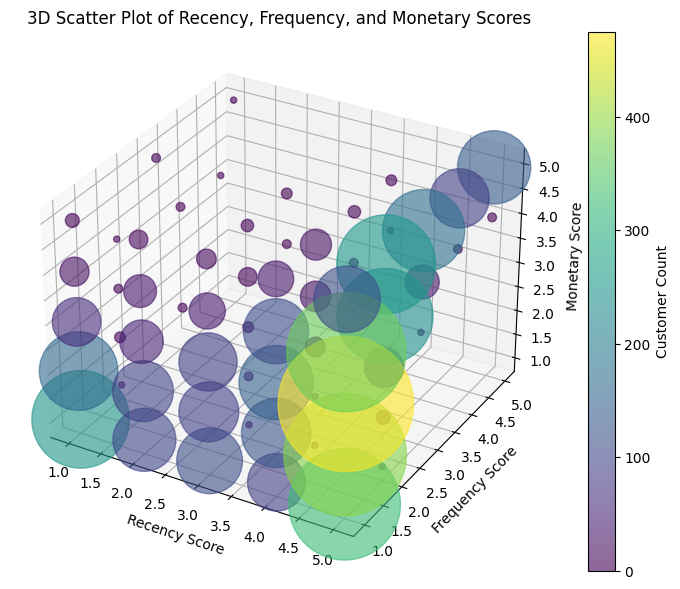

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Aggregate data to get counts of customer_id for each combination of scores
aggregated_df = df_customer.groupby(['Recency_Score', 'Frequency_Score', 'Monetary_Score']).size().reset_index(name='count')

# Extract values for plotting
x = aggregated_df['Recency_Score']
y = aggregated_df['Frequency_Score']
z = aggregated_df['Monetary_Score']
counts = aggregated_df['count']

# Plotting
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(x, y, z, c=counts, cmap='viridis', s=counts*20, alpha=0.6)

# Adding labels and color bar
ax.set_xlabel('Recency Score')
ax.set_ylabel('Frequency Score')
ax.set_zlabel('Monetary Score')
plt.colorbar(scatter, ax=ax, label='Customer Count')

plt.title('3D Scatter Plot of Recency, Frequency, and Monetary Scores')
plt.show()


In [ ]:
df_customer[(df_customer["Frequency_Score"]==1)& (df_customer["Recency_Score"]==5)].count()

,0
CustomerID,1671
Frequency,1671
Unique_StockCodes,1671
Last_visit,1671
Total_Sales,1671
Date,1671
Days_since_last_visit,1671
Recency,1671
Recency_Score,1671
Frequency_Score,1671


In [ ]:
df_customer['RFM_Score'] = (df_customer['Recency_Score'].astype(str) +
                            df_customer['Frequency_Score'].astype(str) +
                            df_customer['Monetary_Score'].astype(str))

In [ ]:
rfm_counts = df_customer['RFM_Score'].value_counts().reset_index()

# Rename the columns for better readability
rfm_counts.columns = ['RFM_Score', 'Customer_Count']

# Display the result
print(rfm_counts)

   RFM_Score  Customer_Count
0        513             475
1        512             389
2        514             369
3        511             323
4        525             253
..       ...             ...
57       444               1
58       235               1
59       124               1
60       121               1
61       321               1

[62 rows x 2 columns]


In [ ]:
def customer_segment_label(rfm_score):
    if rfm_score in ['555', '554', '544', '545', '454', '455', '445']:
        return 'Champions'

    elif rfm_score in ['543', '444', '435', '355', '354', '345', '344', '335']:
        return 'Loyal'

    elif rfm_score in ['553', '551', '552', '541', '542', '533', '532', '531', '452', '451',
                       '442', '441', '453', '433', '432', '423', '353', '352', '351', '342',
                       '341', '333', '323']:
        return 'Potential Loyalist'

    elif rfm_score in ['512', '511', '422', '421', '412', '411', '311']:
        return 'New Customers'

    elif rfm_score in ['525', '524', '523', '522', '521', '515', '514', '513', '425', '424',
                       '414', '415', '315', '314', '313']:
        return 'Promising'

    elif rfm_score in ['535', '534', '443', '434', '343', '334', '325', '324']:
        return 'Need Attention'

    elif rfm_score in ['331', '321', '312', '221', '213', '231', '241', '251']:
        return 'About To Sleep'

    elif rfm_score in ['155', '154', '144', '214', '215', '115', '114', '113']:
        return 'Cannot Lose Them But Losing'

    elif rfm_score in ['255', '254', '245', '244', '253', '252', '243', '242', '235', '234',
                       '225', '224', '153', '152', '145', '143', '142', '135', '134', '133',
                       '125', '124']:
        return 'At Risk'

    elif rfm_score in ['332', '322', '233', '232', '223', '222', '132', '123', '122', '121', '211']:
        return 'Hibernating Customers'

    elif rfm_score in ['111', '112', '121', '131', '141', '151']:
        return 'Lost Customers'

    else:
        return 'Unknown'

# Apply the function to your DataFrame
df_customer['Customer_Segment'] = df_customer['RFM_Score'].apply(customer_segment_label)


In [ ]:
import plotly.express as px

# Count the number of customers in each segment
segment_counts = df_customer['Customer_Segment'].value_counts().reset_index()
segment_counts.columns = ['Customer_Segment', 'Count']

# Create a tree map using Plotly
fig = px.treemap(segment_counts, path=['Customer_Segment'], values='Count',
                 title='Customer Segmentation Tree Map',
                 color='Count', color_continuous_scale='Blues')

# Update the text to display both the segment name and count
fig.update_traces(texttemplate='%{label}<br>Count: %{value}', textinfo='label+value')

# Show the tree map
fig.show()


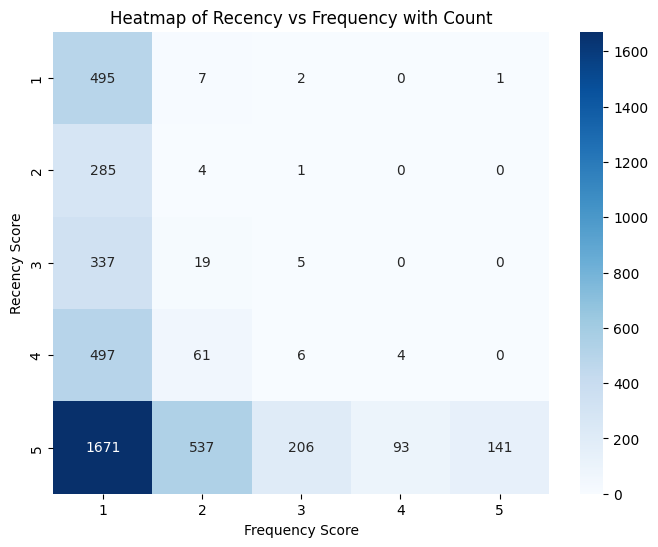

In [ ]:
# Create a pivot table with Recency_Score and Frequency_Score as the axes, and Monetary_Score as the values
pivot_table = df_customer.pivot_table(index='Recency_Score', columns='Frequency_Score',
                                      values='Monetary_Score', aggfunc='count', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, cmap='Blues', fmt='g')
plt.title('Heatmap of Recency vs Frequency with Count')
plt.ylabel('Recency Score')
plt.xlabel('Frequency Score')
plt.show()


Insights:

1. High Recency, Low Frequency (Bottom-left region):

  * The most populated cell is in the combination of Recency Score 5 and Frequency Score 1, indicating many customers who have purchased recently but have not bought frequently.
  * This suggests that recent customers are more common, but their purchasing behavior might not be consistent over time.
2. Low Recency, Low Frequency (Top-left region):

  * The cells with Recency Score 1 and Frequency Score 1 also show a relatively high count of customers, indicating that there are many customers who haven’t purchased recently and have also made few purchases overall.
  * These customers might be at risk of churning and may need re-engagement strategies.
3. High Recency, High Frequency (Bottom-right region):

  * There are fewer customers in the cells where both Recency Score and Frequency Score are high (e.g., Recency Score 5 and Frequency Score 5).
  * This could mean that very few customers are actively purchasing frequently, even among those who have recently made purchases.
4. Low Recency, High Frequency (Top-right region):

  * The number of customers with a low Recency Score and high Frequency Score is minimal.
  * This suggests that customers who haven't purchased recently are not likely to have been frequent purchasers in the past.
5. Concentration in Lower Scores:

  * The higher counts are more concentrated in the cells where Frequency Score is lower, regardless of the Recency Score.
  * This indicates that most customers do not make purchases frequently, highlighting potential opportunities for campaigns aimed at increasing purchase frequency.

### Wholesale and Retail Purchases

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

# Reshape the data for K-Means
quantities = df['Quantity'].values.reshape(-1, 1)

# Apply K-Means with 2 clusters (wholesale and retail)
kmeans = KMeans(n_clusters=2, random_state=0).fit(quantities)

# Assign cluster labels to each transaction
df['quantity_cluster'] = kmeans.labels_

# Check the cluster centers to find the threshold
print("Cluster centers:", kmeans.cluster_centers_)


Cluster centers: [[9.33088537e+00]
 [7.76050000e+04]]


#### Wholesale Tranactions

In [ ]:
df[df["Abs_Quantity"]>20].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,WeekDay,Date,...,Order_Cancelled,Order_Returned,Order_Purchased,Order_Status,Sales,Absolute_Sales,Order_,Purchased_Sales,Cancelled_Sales,quantity_cluster
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,2,2010-12-01,...,0,0,1,Order_Purchased,54.08,54.08,1.0,54.08,0.0,0
26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583.0,France,2,2010-12-01,...,0,0,1,Order_Purchased,90.00,90.00,1.0,90.00,0.0,0
27,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583.0,France,2,2010-12-01,...,0,0,1,Order_Purchased,90.00,90.00,1.0,90.00,0.0,0
30,536370,21883,STARS GIFT TAPE,24,2010-12-01 08:45:00,0.65,12583.0,France,2,2010-12-01,...,0,0,1,Order_Purchased,15.60,15.60,1.0,15.60,0.0,0
31,536370,10002,INFLATABLE POLITICAL GLOBE,48,2010-12-01 08:45:00,0.85,12583.0,France,2,2010-12-01,...,0,0,1,Order_Purchased,40.80,40.80,1.0,40.80,0.0,0


In [ ]:
df_wholesale = df[df["Abs_Quantity"]>20]
df_wholesale.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,WeekDay,Date,...,Order_Cancelled,Order_Returned,Order_Purchased,Order_Status,Sales,Absolute_Sales,Order_,Purchased_Sales,Cancelled_Sales,quantity_cluster
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,2,2010-12-01,...,0,0,1,Order_Purchased,54.08,54.08,1.0,54.08,0.0,0
26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583.0,France,2,2010-12-01,...,0,0,1,Order_Purchased,90.00,90.00,1.0,90.00,0.0,0
27,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583.0,France,2,2010-12-01,...,0,0,1,Order_Purchased,90.00,90.00,1.0,90.00,0.0,0
30,536370,21883,STARS GIFT TAPE,24,2010-12-01 08:45:00,0.65,12583.0,France,2,2010-12-01,...,0,0,1,Order_Purchased,15.60,15.60,1.0,15.60,0.0,0
31,536370,10002,INFLATABLE POLITICAL GLOBE,48,2010-12-01 08:45:00,0.85,12583.0,France,2,2010-12-01,...,0,0,1,Order_Purchased,40.80,40.80,1.0,40.80,0.0,0


In [ ]:
df_wholesale.Quantity.describe()

,Quantity
count,58639.000000
mean,50.778833
std,661.345210
min,-80995.000000
25%,24.000000
50%,25.000000
75%,48.000000
max,80995.000000


In [ ]:
df_wholesale[df_wholesale["Quantity"]==80995]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,WeekDay,Date,...,Order_Cancelled,Order_Returned,Order_Purchased,Order_Status,Sales,Absolute_Sales,Order_,Purchased_Sales,Cancelled_Sales,quantity_cluster
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,4,2011-12-09,...,0,0,1,Order_Purchased,168469.6,168469.6,1.0,168469.6,0.0,1


In [ ]:
df_wholesale.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'WeekDay', 'Date', 'Abs_Quantity',
       'Order_Cancelled', 'Order_Returned', 'Order_Purchased', 'Order_Status',
       'Sales', 'Absolute_Sales', 'Order_', 'Purchased_Sales',
       'Cancelled_Sales', 'quantity_cluster'],
      dtype='object')

In [ ]:
df_wholesale.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'WeekDay', 'Date', 'Abs_Quantity',
       'Order_Cancelled', 'Order_Returned', 'Order_Purchased', 'Order_Status',
       'Sales', 'Absolute_Sales', 'Order_', 'Purchased_Sales',
       'Cancelled_Sales', 'quantity_cluster'],
      dtype='object')

In [ ]:
print("Number of Orders Purchased Wholesale",df_wholesale[df_wholesale["Order_Purchased"]==1].InvoiceNo.nunique())
print("Number of Order Cancelled Wholesale",df_wholesale[df_wholesale["Order_Cancelled"]==1].InvoiceNo.nunique())
print("Number of Order Returned Wholesale",df_wholesale[df_wholesale["Order_Returned"]==1].InvoiceNo.nunique())

Number of Orders Purchased Wholesale 12889
Number of Order Cancelled Wholesale 399
Number of Order Returned Wholesale 787


In [ ]:
print("Sales from Orders Purchased Wholesale",df_wholesale[df_wholesale["Order_Purchased"]==1].Sales.sum())
print("Sales from Order Cancelled Wholesale",df_wholesale[df_wholesale["Order_Cancelled"]==1].Sales.sum())
print("Sales from Order Returned Wholesale",df_wholesale[df_wholesale["Order_Returned"]==1].Sales.sum())

Sales from Orders Purchased Wholesale 4645423.09
Sales from Order Cancelled Wholesale -386112.12
Sales from Order Returned Wholesale 0.0


In [ ]:
df_wholesale["Sales"].sum()

4259310.97

In [ ]:
df_wholesale[df_wholesale["Order_Purchased"]==1].Description.value_counts().head(10)

,count
Description,
PACK OF 72 RETROSPOT CAKE CASES,724
WORLD WAR 2 GLIDERS ASSTD DESIGNS,463
PACK OF 60 PINK PAISLEY CAKE CASES,404
ASSORTED COLOUR BIRD ORNAMENT,398
WHITE HANGING HEART T-LIGHT HOLDER,393
60 TEATIME FAIRY CAKE CASES,367
RED RETROSPOT WRAP,333
MINI PAINT SET VINTAGE,324
RABBIT NIGHT LIGHT,314


In [ ]:
df_wholesale[df_wholesale["Order_Cancelled"]==1].Description.value_counts().head(10)

,count
Description,
Manual,19
PACK OF 72 RETROSPOT CAKE CASES,11
REGENCY CAKESTAND 3 TIER,8
JUMBO BAG RED RETROSPOT,8
60 TEATIME FAIRY CAKE CASES,7
PAPER CHAIN KIT 50'S CHRISTMAS,7
JUMBO BAG APPLES,6
TRAVEL CARD WALLET KEEP CALM,6
VICTORIAN GLASS HANGING T-LIGHT,5


In [ ]:
df_wholesale[df["Description"]=="Manual"].InvoiceNo.count()

45

In [ ]:
df_wholesale[df_wholesale["Order_Returned"]==1].Description.value_counts().head(10)

,count
Description,
Free item,400
check,97
?,41
damages,39
sold as set on dotcom,16
damaged,16
Damaged,10
"Unsaleable, destroyed.",9
thrown away,8


Insights:
1. Quantity Distribution
  * Average Quantity per Order: 50.78 units, suggesting larger bulk purchases typical of wholesale transactions.
  * Standard Deviation: 661.35 units, indicating significant variability in the order sizes, from very small to extremely large quantities.
  * Minimum Quantity: -80,995 units, which represents large-scale returns.
  * Maximum Quantity: 80,995 units, reflecting bulk orders.
  * Median Quantity: 25 units, with 25% of orders containing 24 units and 75% containing up to 48 units.
2. Order and Sales Overview
  * Total Orders Purchased: 12,889.
  * Total Orders Canceled: 399, representing approximately 3.1% of total orders.
  * Total Orders Returned: 787, about 6.1% of total orders, which is higher compared to cancellations.
  * Sales from Purchased Orders: 4,645,423.09, indicating a significant revenue stream from wholesale.
  * Sales Impact of Canceled Orders: -386,112.12, showing revenue losses due to cancellations.
  * Sales Impact of Returned Orders: £0.0, which might indicate adjustments or replacements rather than direct sales value impact.
3. Top 10 Most Purchased Wholesale Items
  * Similar to retail, the "PACK OF 72 RETROSPOT CAKE CASES" is the most purchased item, followed by "WORLD WAR 2 GLIDERS ASSTD DESIGNS" and "PACK OF 60 PINK PAISLEY CAKE CASES." This indicates a strong demand for these items across different customer segments.
  * Other top items include various cake cases, decorative items like "ASSORTED COLOUR BIRD ORNAMENT" and "WHITE HANGING HEART T-LIGHT HOLDER," reflecting a preference for gifting and decor products in bulk purchases.
4. Top 10 Most Canceled Wholesale Items
  * Top Canceled Product: "Manual" entries with 19 cancellations. This may point to data correction needs or manual order adjustments.
  * Notable Canceled Items: "PACK OF 72 RETROSPOT CAKE CASES" (11 cancellations) and "REGENCY CAKESTAND 3 TIER" (8 cancellations). These items might be prone to reconsideration or adjustments post-order.
  * Other Canceled Products: Items like "JUMBO BAG RED RETROSPOT" and "60 TEATIME FAIRY CAKE CASES" also appear, indicating they might be reconsidered or have logistical issues at the wholesale level.
5. Top 10 Most Returned Wholesale Items
  * Most Returned Item: "Free item" with 400 returns, indicating that a significant number of complimentary items are being sent back or rejected.
  * Returns with Issues: Many returns are labeled as "check," "damages," "damaged," or "unsaleable," suggesting quality control or condition issues with some products.
  * Ambiguous Returns: Descriptions like "?", "??", and "sold as set on dotcom" point to possible confusion over product condition or order specifications, indicating a need for clearer product descriptions or order documentation.

#### Retail Transactions

In [ ]:
df_retail = df[df["Abs_Quantity"]<=20]

In [ ]:
df_retail.Quantity.describe()

,Quantity
count,477999.000000
mean,4.570886
std,4.557528
min,-20.000000
25%,1.000000
50%,3.000000
75%,6.000000
max,20.000000


In [ ]:
df_retail
print("Number of Orders Purchased",df_retail[df_retail["Order_Purchased"]==1].InvoiceNo.nunique())
print("Number of Order Cancelled",df_retail[df_retail["Order_Cancelled"]==1].InvoiceNo.nunique())
print("Number of Order Returned",df_retail[df_retail["Order_Returned"]==1].InvoiceNo.nunique())

Number of Orders Purchased 18398
Number of Order Cancelled 3586
Number of Order Returned 549


In [ ]:
print("Sales from Orders Purchased",df_retail[df_retail["Order_Purchased"]==1].Sales.sum())
print("Sales from Order Cancelled",df_retail[df_retail["Order_Cancelled"]==1].Sales.sum())
print("Sales from Order Returned",df_retail[df_retail["Order_Returned"]==1].Sales.sum())

Sales from Orders Purchased 5985625.653999998
Sales from Order Cancelled -507867.61
Sales from Order Returned 0.0


In [ ]:
df_retail["Sales"].sum()

5477758.044

In [ ]:
df_retail[df_retail["Order_Purchased"]==1].Description.value_counts().head(10)

,count
Description,
WHITE HANGING HEART T-LIGHT HOLDER,1918
REGENCY CAKESTAND 3 TIER,1899
JUMBO BAG RED RETROSPOT,1811
PARTY BUNTING,1525
LUNCH BAG RED RETROSPOT,1442
SET OF 3 CAKE TINS PANTRY DESIGN,1335
LUNCH BAG BLACK SKULL.,1238
NATURAL SLATE HEART CHALKBOARD,1200
POSTAGE,1125


In [ ]:
df_retail[df_retail["Order_Cancelled"]==1].Description.value_counts().head(10)

,count
Description,
Manual,225
REGENCY CAKESTAND 3 TIER,172
POSTAGE,126
JAM MAKING SET WITH JARS,87
Discount,73
SET OF 3 CAKE TINS PANTRY DESIGN,72
SAMPLES,60
ROSES REGENCY TEACUP AND SAUCER,51
STRAWBERRY CERAMIC TRINKET BOX,51


In [ ]:
df_retail[df_retail["Description"]=="Manual"].InvoiceNo.count()

522

Insights:
1. Quantity Distribution
  * Average Quantity per Order: 4.57 units
  * Standard Deviation: 4.56 units, indicating moderate variability in the quantities ordered.
  * Minimum Quantity: -20, representing returns (negative quantities).
  * Maximum Quantity: 20 units.
  * Median Quantity: 3 units, with 25% of orders containing a single unit and 75% containing up to 6 units.
2. Order and Sales Overview
  * Total Orders Purchased: 18,398.
  * Total Orders Canceled: 3,586, representing approximately 19.5% of total orders.
  * Total Orders Returned: 549, which is about 3% of total orders.
  * Sales from Purchased Orders: 5,985,625.65.
  * Sales Impact of Canceled Orders: -507,867.61, highlighting the revenue loss due to cancellations.
  * Sales Impact of Returned Orders: 0.0, likely due to returns being adjusted with no direct sales value.
3. Top 10 Most Purchased Items
  * Items like the "PACK OF 72 RETROSPOT CAKE CASES" and "WORLD WAR 2 GLIDERS ASSTD DESIGNS" are among the top 10 most purchased, indicating their popularity or high demand. These products might appeal more to the customers.
  * Other notable items include various cake cases, decorative items, and vintage-inspired products like the "MINI PAINT SET VINTAGE" and "RABBIT NIGHT LIGHT."
4. Top 10 Most Canceled Items
  * Top Canceled Product: "Manual" with 225 cancellations and a total of 522 invoices,, similar to the wholesale segment potentially indicate issues related to manual data entry or corrections.
  * Other Canceled Products: These include "REGENCY CAKESTAND 3 TIER" (172 cancellations) and "POSTAGE" (126 cancellations). These items may have been prone to changes or errors during the order process.
  * Discount and Samples: With 73 and 60 cancellations, respectively, these might indicate adjustments or corrections after promotions.


#### Checking which products are popular for both wholesale and retail transactions

In [ ]:
# Group by 'StockCode' and 'Description', then calculate the sum of 'Quantity' for each stock code
stockcode_quantity = df_wholesale.groupby(['StockCode', 'Description'])['Quantity'].sum().reset_index()

# Sort the result in descending order to find the most ordered stock codes
stockcode_quantity_sorted = stockcode_quantity.sort_values(by='Quantity', ascending=False)

# Extract the top 10 most ordered stock codes from wholesale
top_10_wholesale = stockcode_quantity_sorted.head(10)
top_10_wholesale

,StockCode,Description,Quantity
3008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53403
444,21212,PACK OF 72 RETROSPOT CAKE CASES,33853
3366,85099B,JUMBO BAG RED RETROSPOT,33440
1173,22197,POPCORN HOLDER,32309
2072,23084,RABBIT NIGHT LIGHT,26636
1446,22492,MINI PAINT SET VINTAGE,26314
3212,84879,ASSORTED COLOUR BIRD ORNAMENT,25427
3389,85123A,WHITE HANGING HEART T-LIGHT HOLDER,24487
1590,22616,PACK OF 12 LONDON TISSUES,24306
960,21977,PACK OF 60 PINK PAISLEY CAKE CASES,23553


In [ ]:
# Group by 'StockCode' and 'Description', then calculate the sum of 'Quantity' for each stock code
stockcode_quantity_retail = df_retail.groupby(['StockCode', 'Description'])['Quantity'].sum().reset_index()

# Sort the result in descending order to find the most ordered stock codes
stockcode_quantity_sorted_retail = stockcode_quantity_retail.sort_values(by='Quantity', ascending=False)

# Extract the top 10 most ordered stock codes from retail
top_10_retail = stockcode_quantity_sorted_retail.head(10)
top_10_retail

,StockCode,Description,Quantity
4301,85099B,JUMBO BAG RED RETROSPOT,13820
4028,84879,ASSORTED COLOUR BIRD ORNAMENT,10855
4326,85123A,WHITE HANGING HEART T-LIGHT HOLDER,10519
200,20725,LUNCH BAG RED RETROSPOT,10308
202,20727,LUNCH BAG BLACK SKULL.,8059
203,20728,LUNCH BAG CARS BLUE,7782
1589,22423,REGENCY CAKESTAND 3 TIER,7755
3307,47566,PARTY BUNTING,7668
2209,22961,JAM MAKING SET PRINTED,7560
1555,22386,JUMBO BAG PINK POLKADOT,7358


In [ ]:
# Check if top 10 retail items are present in top 10 wholesale items
top_10_retail['Present_in_Wholesale'] = top_10_retail['StockCode'].isin(top_10_wholesale['StockCode'])

# Check if top 10 wholesale items are present in top 10 retail items
top_10_wholesale['Present_in_Retail'] = top_10_wholesale['StockCode'].isin(top_10_retail['StockCode'])

# Display the results for retail and wholesale
print("Top 10 Retail Items with Presence in Wholesale:")
(top_10_retail[['StockCode', 'Description', 'Quantity', 'Present_in_Wholesale']])

Top 10 Retail Items with Presence in Wholesale:


,StockCode,Description,Quantity,Present_in_Wholesale
4301,85099B,JUMBO BAG RED RETROSPOT,13820,True
4028,84879,ASSORTED COLOUR BIRD ORNAMENT,10855,True
4326,85123A,WHITE HANGING HEART T-LIGHT HOLDER,10519,True
200,20725,LUNCH BAG RED RETROSPOT,10308,False
202,20727,LUNCH BAG BLACK SKULL.,8059,False
203,20728,LUNCH BAG CARS BLUE,7782,False
1589,22423,REGENCY CAKESTAND 3 TIER,7755,False
3307,47566,PARTY BUNTING,7668,False
2209,22961,JAM MAKING SET PRINTED,7560,False
1555,22386,JUMBO BAG PINK POLKADOT,7358,False


In [ ]:
print("\nTop 10 Wholesale Items with Presence in Retail:")
(top_10_wholesale[['StockCode', 'Description', 'Quantity', 'Present_in_Retail']])


Top 10 Wholesale Items with Presence in Retail:


,StockCode,Description,Quantity,Present_in_Retail
3008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53403,False
444,21212,PACK OF 72 RETROSPOT CAKE CASES,33853,False
3366,85099B,JUMBO BAG RED RETROSPOT,33440,True
1173,22197,POPCORN HOLDER,32309,False
2072,23084,RABBIT NIGHT LIGHT,26636,False
1446,22492,MINI PAINT SET VINTAGE,26314,False
3212,84879,ASSORTED COLOUR BIRD ORNAMENT,25427,True
3389,85123A,WHITE HANGING HEART T-LIGHT HOLDER,24487,True
1590,22616,PACK OF 12 LONDON TISSUES,24306,False
960,21977,PACK OF 60 PINK PAISLEY CAKE CASES,23553,False


Insights:

1. Shared Demand in Retail and Wholesale:

  Items like "JUMBO BAG RED RETROSPOT" and "WHITE HANGING HEART T-LIGHT HOLDER" are popular in both segments, making them good candidates for focused inventory and promotion.

2. Retail-Specific Popularity of Lunch Bags:

 Products like "LUNCH BAG RED RETROSPOT" sell well in retail but not wholesale, suggesting a focus on direct-to-consumer marketing for these items.

### Average Order Value

In [ ]:
# Calculate Average Order Value (AOV) for each customer
df_customer['Avg_Order_Value'] = df_customer['Total_Sales'] / df_customer['Frequency']

# Fill any NaN values in Avg_Order_Value with 0 (in case of customers with no orders)
df_customer['Avg_Order_Value'] = df_customer['Avg_Order_Value'].fillna(0)

In [ ]:
# Calculate Average Order Value (AOV) for each customer
df_customer['Avg_Order_Value'] = df_customer['Total_Sales'] / df_customer['Frequency']

# Display the first few rows to verify
df_customer[['CustomerID', 'Avg_Order_Value']].head()

,CustomerID,Avg_Order_Value
0,12346.0,0.000000
1,12347.0,615.714286
2,12348.0,449.310000
3,12349.0,1757.550000
4,12350.0,334.400000


In [ ]:
# Calculate overall total sales from all customers
total_sales_overall = df_customer['Total_Sales'].sum()

# Calculate overall total frequency (number of unique invoices)
total_frequency_overall = df_customer['Frequency'].sum()

# Calculate Overall Average Order Value (AOV)
overall_aov = round(total_sales_overall / total_frequency_overall, 2) if total_frequency_overall > 0 else 0

# Display the overall AOV
print(f"Overall Average Order Value: {overall_aov}")

Overall Average Order Value: 373.07


In [ ]:
df_customer[df_customer["CustomerID"]=="18277.0"].Avg_Order_Value

,Avg_Order_Value
4365,48.815


In [ ]:
df_wholesale[df["CustomerID"]=="18277.0"]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,WeekDay,Date,...,Order_Cancelled,Order_Returned,Order_Purchased,Order_Status,Sales,Absolute_Sales,Order_,Purchased_Sales,Cancelled_Sales,quantity_cluster
393901,570859,22578,WOODEN STAR CHRISTMAS SCANDINAVIAN,24,2011-10-12 15:22:00,0.29,18277.0,United Kingdom,2,2011-10-12,...,0,0,1,Order_Purchased,6.96,6.96,1.0,6.96,0.0,0


In [ ]:
# Calculate total sales (including cancellations) and order counts for each customer
customer_sales = df_wholesale.groupby('CustomerID')['Sales'].sum()  # 'Sales' includes both positive and negative amounts
customer_orders = df_wholesale.groupby('CustomerID')['InvoiceNo'].nunique()  # Count unique invoices for each customer

# Calculate AOV for each customer
customer_aov = (customer_sales / customer_orders).reset_index()
customer_aov.columns = ['CustomerID', 'Average_Order_Value']

# Display the AOV for each customer
print("Average Order Value for Each Customer:")
(customer_aov)

Average Order Value for Each Customer:


,CustomerID,Average_Order_Value
0,12346.0,0.000000
1,12347.0,173.168571
2,12348.0,355.060000
3,12349.0,131.400000
4,12350.0,20.400000
...,...,...
3527,18276.0,83.400000
3528,18277.0,6.960000
3529,18282.0,13.920000
3530,18287.0,410.600000


In [ ]:
# Calculate overall total sales (including cancellations) and total order count
total_sales = df_wholesale['Sales'].sum()  # Sum of all sales, including negative values for cancellations
total_orders = df_wholesale['InvoiceNo'].nunique()  # Total unique orders (including cancellations)

# Calculate the overall AOV
overall_aov = round(total_sales / total_orders, 2)

# Display the overall AOV
print(f"\nOverall Average Order Value for Wholesale: {overall_aov}")


Overall Average Order Value for Wholesale: 297.06


In [ ]:
# Calculate total sales (including cancellations) and order counts for each customer
customer_sales_retail = df_retail.groupby('CustomerID')['Sales'].sum()  # 'Sales' includes both positive and negative amounts
customer_orders_retail = df_retail.groupby('CustomerID')['InvoiceNo'].nunique()  # Count unique invoices for each customer

# Calculate AOV for each customer
customer_aov_retail = (customer_sales_retail / customer_orders_retail).reset_index()
customer_aov_retail.columns = ['CustomerID', 'Average_Order_Value']

# Display the AOV for each customer
print("Average Order Value for Each Retail Customer:")
(customer_aov_retail)


Average Order Value for Each Retail Customer:


,CustomerID,Average_Order_Value
0,12347.0,442.545714
1,12348.0,94.250000
2,12349.0,1626.150000
3,12350.0,314.000000
4,12352.0,140.491818
...,...,...
4252,18281.0,80.820000
4253,18282.0,54.226667
4254,18283.0,127.845625
4255,18287.0,302.740000


In [ ]:
# Calculate overall total sales (including cancellations) and total order count
total_sales_retail = df_retail['Sales'].sum()  # Sum of all sales, including negative values for cancellations
total_orders_retail = df_retail['InvoiceNo'].nunique()  # Total unique orders (including cancellations)

# Calculate the overall AOV
overall_aov_retail = round(total_sales_retail / total_orders_retail, 2)

# Display the overall AOV
print(f"\nOverall Average Order Value for Retail: {overall_aov_retail}")


Overall Average Order Value for Retail: 237.75


### Cancellation Rate

In [ ]:
# Calculate the total unique InvoiceNo for each CustomerID
total_invoices = df[df['Order_Purchased']==1].groupby('CustomerID')['InvoiceNo'].nunique()

# Calculate the unique InvoiceNo for cancelled orders (assuming 'Order_Cancelled' is a boolean column)
cancelled_invoices = (df[df['Order_Cancelled']==1].groupby('CustomerID')['InvoiceNo'].nunique())

# Calculate the return rate for each CustomerID
# To handle cases where there are no cancelled orders, fill missing values with 0
cancel_rate = round((100* cancelled_invoices / total_invoices),2).fillna(0)

# Convert the return_rate to a DataFrame for better readability
cancel_rate = cancel_rate.reset_index()
cancel_rate.columns = ['CustomerID', 'Cancel_Rate']

# Display the return rate for each customer
print(cancel_rate)

     CustomerID  Cancel_Rate
0       12346.0       100.00
1       12347.0         0.00
2       12348.0         0.00
3       12349.0         0.00
4       12350.0         0.00
...         ...          ...
4367    18281.0         0.00
4368    18282.0        50.00
4369    18283.0         0.00
4370    18287.0         0.00
4371    Unknown        12.75

[4372 rows x 2 columns]


In [ ]:
# Calculate the total number of unique invoices for purchased orders
total_invoices = df[df['Order_Purchased'] == 1]['InvoiceNo'].nunique()

# Calculate the total number of unique invoices for canceled orders
cancelled_invoices = df[df['Order_Cancelled'] == 1]['InvoiceNo'].nunique()

# Calculate the overall cancellation rate
overall_cancel_rate = round((100 * cancelled_invoices / total_invoices), 2)

# Display the overall cancellation rate
print(f"Overall Cancellation Rate: {overall_cancel_rate}%")

Overall Cancellation Rate: 19.22%


In [ ]:
# Calculate total orders in df_wholesale (both purchased and canceled)
total_orders_wholesale = df_wholesale['InvoiceNo'].nunique()  # Unique invoice count for total orders
total_canceled_orders_wholesale = df_wholesale['Order_Cancelled'].sum()  # Total canceled orders

# Calculate cancellation rate
cancellation_rate_wholesale = (total_canceled_orders_wholesale / total_orders_wholesale) * 100 if total_orders_wholesale > 0 else 0

# Display the cancellation rate for wholesale
print(f"Wholesale Cancellation Rate: {round(cancellation_rate_wholesale, 2)}%")

Wholesale Cancellation Rate: 6.07%


In [ ]:
# Calculate total orders in df_retail (both purchased and canceled)
total_orders_retail = df_retail['InvoiceNo'].nunique()  # Unique invoice count for total orders
total_canceled_orders_retail = df_retail['Order_Cancelled'].sum()  # Total canceled orders

# Calculate cancellation rate
cancellation_rate_retail = (total_canceled_orders_retail / total_orders_retail) * 100 if total_orders_retail > 0 else 0

# Display the cancellation rate for retail
print(f"Retail Cancellation Rate: {round(cancellation_rate_retail, 2)}%")

Retail Cancellation Rate: 36.37%


Insights:
1. Data Refinement: Post-cleaning, the dataset consists of 536,641 transactions (reduced from 541,909), eliminating 5,268 duplicate entries. This enhances the integrity and reliability of the analysis.
2. Product Diversity: The dataset features 4,070 unique StockCodes and 4,223 distinct Descriptions, reflecting a broad product assortment. However, slight mismatches between StockCodes and Descriptions may indicate data entry inconsistencies or overlapping product identifiers.
3. Customer Base Composition: The analysis reveals 4,372 unique CustomerIDs, yet 25% of transactions lack this identifier, suggesting a considerable proportion of guest checkouts or transactions that are not customer-specific.
4. Order Variability: The average order quantity stands at approximately 9.62, with a substantial standard deviation, highlighting the coexistence of single-item purchases and bulk transactions.
5. Unit Price Dispersion: The average unit price is approximately 4.63, coupled with a high degree of variability, suggesting a mix of low-priced and premium products. Negative pricing indicates potential adjustments for refunds or data errors.
6. High-Demand Products: StockCode 22197 emerges as the leading product with 56,427 units sold, followed by StockCode 84077. These items are critical to the company's sales performance and warrant strategic attention.
7. Sales Timing Patterns: Transaction activity peaks between 10 AM and 3 PM, with a marked decrease post-4 PM. Weekdays, particularly Thursdays, register the highest sales volumes, reflecting established consumer behavior patterns.
8. Seasonal Sales Trends: November and December exhibit the highest transaction counts, driven by holiday shopping, while January and February experience lower activity, suggesting a typical post-holiday slowdown.
9. Geographic Focus: The United Kingdom is the primary market, with a substantial customer base compared to other European countries such as Germany and France. Markets like Spain and Italy present opportunities for targeted growth.
10. Return and Cancellation Trends: Approximately 15% of orders are canceled, and 5% are returned. Notably, 64% of returns are associated with free items, suggesting areas for improvement in managing loyalty gifts and free offers.
11. Financial Impact of Cancellations: Canceled orders account for a financial impact of around -893,979.70, while completed purchases contribute positively with total sales of approximately 10,631,050.00.
12. Customer Purchase Patterns: A significant proportion of customers fall into low-frequency purchasing segments, with few high-recency, high-frequency buyers, highlighting potential retention challenges.
13. Pricing Strategy Insights: The majority of products are priced below 10 units, yet the presence of high-value items (up to 38,970) indicates a balanced approach to targeting both everyday consumers and premium buyers.
14. Data Quality Assessment: Overall, the dataset is robust, though issues such as negative pricing and missing CustomerIDs warrant further attention for a more precise analysis.


Recommendations:
1. Enhance Data Integrity: Address inconsistencies between StockCodes and Descriptions, and rectify negative pricing values to ensure data accuracy and reliability.
2. Convert Guest Checkouts: Implement incentives such as discounts or loyalty points to encourage guest users to create accounts, improving data tracking and fostering repeat purchases.
3. Optimize Inventory Management: Prioritize inventory for high-demand products like StockCodes 22197 and 84077 to maintain stock levels, minimize stockouts, and sustain revenue flow.
4. Increase Purchase Frequency: Target recent, low-frequency buyers with tailored promotions or loyalty programs to encourage more frequent purchases and improve customer lifetime value.
5. Capitalize on Seasonal Demand: Leverage the holiday season's sales momentum by implementing targeted promotions and expanding inventory during November and December.
6. Expand Market Presence: Focus on localized marketing strategies in underrepresented European markets, such as Spain and Italy, to capture new customers and increase market share.
7. Refine Loyalty Programs: Improve the relevance and quality of free items given as loyalty gifts, reducing the likelihood of returns and enhancing customer satisfaction.
8. Reduce Cancellation Rates: Investigate the causes behind the high cancellation rates, particularly on Thursdays, and streamline the checkout process to minimize order cancellations.
9. Broaden Premium Product Range: Expand the offerings in high-value product categories to attract affluent customers and boost revenue from high-margin items.
10. Optimize Operational Focus: Concentrate customer service and marketing efforts during peak transaction hours (10 AM to 3 PM) to maximize engagement and support during periods of high sales activity.
These insights and strategic recommendations are designed to refine business operations, improve customer engagement, and support sustainable growth within the online retail sector.
11. Incorporate Customer Feedback for Product Improvement: Analyze feedback on high-return products to identify issues like quality or sizing, using insights to refine offerings and reduce returns.

12. Align Loyalty Programs with Customer Preferences: Use feedback to tailor loyalty rewards and free items, reducing returns and enhancing customer satisfaction by offering items that better match customer interests.